## Introduction 

This dataset is a catalogue of rides taken on the LA-Metro Bike Share Network.

"The Metro Bike Share system makes bikes available 24/7, 365 days a year in Downtown LA, Central LA, Port of LA and the Westside. Metro Bike Share offers convenient round-the-clock access to a fleet of bicycles for short trips. Metro Bike Share is one of LA Metro's multiple public transportation options for Angelenos and visitors to get around."
<br>-https://bikeshare.metro.net/about/

Bike sharing networks have been established in cities of all sizes, they allow residents and visitors a fun, cheap, fast and  easy way to explore the city they are based in and have even become part of regular commuter routines. Although a bicycle is in itself a low-tech transport option, technology has and will continue to play major role in the rapid expansion of bike sharing networks. The bike may be dumb (and they increasingly aren't) but the network itself is very smart.

"Now companies have GPS sensors to track their bikes, and smartphones, credit cards, or transit passes to know who has them—and whom to penalize if the wheels go missing. Riders, meanwhile, can use apps to track down available rides or bike-share stations when they need them."
<br>-Wired Magazine (https://www.wired.com/story/americans-falling-in-love-bike-share/)

And data collection and analysis and with it machine learning is the key to building a bike network that really works. Data can provide many insights and much guidance about a bike sharing network and through this exploration of the LA-Metro Bike Network I hope to demonstrate just some of this potential.

Datset obtained from:

https://www.kaggle.com/cityofLA/los-angeles-metro-bike-share-trip-data

### Load Data and Basic Libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
df=pd.read_csv('metro-bike-share-trip-data.csv')
df.head(10)

,Trip ID,Duration,Start Time,End Time,Starting Station ID,Starting Station Latitude,Starting Station Longitude,Ending Station ID,Ending Station Latitude,Ending Station Longitude,...,Trip Route Category,Passholder Type,Starting Lat-Long,Ending Lat-Long,Neighborhood Councils (Certified),Council Districts,Zip Codes,LA Specific Plans,Precinct Boundaries,Census Tracts
0,18222186,15060,2017-01-19T17:05:00.000,2017-01-19T21:16:00.000,3031.0,34.044701,-118.252441,3000.0,NaN,NaN,...,One Way,Walk-up,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,9518671,77160,2016-10-09T14:37:00.000,2016-10-10T12:03:00.000,NaN,NaN,NaN,3000.0,NaN,NaN,...,One Way,Monthly Pass,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,20444932,86400,2017-02-18T10:15:00.000,2017-02-20T15:20:00.000,3026.0,34.063179,-118.245880,3000.0,NaN,NaN,...,One Way,Walk-up,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,20905031,18840,2017-02-27T12:26:00.000,2017-02-27T17:40:00.000,3023.0,34.050911,-118.240967,3000.0,NaN,NaN,...,One Way,Walk-up,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,21031476,86400,2017-02-27T20:26:00.000,2017-03-01T09:49:00.000,3008.0,34.046612,-118.262733,3000.0,NaN,NaN,...,One Way,Flex Pass,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,9378284,60,2016-10-09T09:40:00.000,2016-10-09T09:41:00.000,NaN,NaN,NaN,NaN,NaN,NaN,...,One Way,Staff Annual,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6,21784648,14760,2017-03-10T17:38:00.000,2017-03-10T21:44:00.000,3065.0,34.060558,-118.238327,3000.0,NaN,NaN,...,One Way,Walk-up,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7,22506739,79020,2017-03-17T19:20:00.000,2017-03-18T17:17:00.000,3063.0,34.049198,-118.252831,3000.0,NaN,NaN,...,One Way,Walk-up,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
8,20889067,86400,2017-02-26T12:18:00.000,2017-02-27T12:36:00.000,3062.0,34.047749,-118.243172,3000.0,NaN,NaN,...,One Way,Walk-up,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
9,18481915,600,2017-01-23T18:48:00.000,2017-01-23T18:58:00.000,3082.0,34.046520,-118.237411,3000.0,NaN,NaN,...,One Way,Monthly Pass,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [3]:
df.shape

(132427, 22)

Feature descriptions from https://bikeshare.metro.net/about/data/

<b>trip_id:</b> Locally unique integer that identifies the trip

<b>duration:</b> Length of trip in <i> minutes*</i>

<b>start_time:</b> The date/time when the trip began, presented in ISO 8601 format in local time

<b>end_time: </b>The date/time when the trip ended, presented in ISO 8601 format in local time

<b>start_station:</b> The station ID where the trip originated 

<b>start_lat:</b> The latitude of the station where the trip originated

<b>start_lon: </b>The longitude of the station where the trip originated

<b>end_station: </b>The station ID where the trip terminated 

<b>end_lat: </b>The latitude of the station where the trip terminated

<b>end_lon: </b>The longitude of the station where the trip terminated

<b>bike_id: </b> Locally unique integer that identifies the bike
    
<b>plan_duration: </b>The number of days that the plan the passholder is using entitles them to ride; 0 is used for a single ride plan (Walk-up)

<b>trip_route_category:</b> "Round Trip" for trips starting and ending at the same station or "One Way" for all other trips

<b>passholder_type: </b>The name of the passholder's plan

*units are actually in but each instance is a multiple of 60 i.e. a whole minute number. We will convert this to minutes

Other features are not officially described by Metro Bike Share

Starting Lat-Long and Ending Lat-Long appear to be repetitions of previous station data and can be dropped safely

Remaining features appear to be LA geographic information not relevant to this study, many of which include large amounts of missing data. These will  also be dropped.

### Data Cleaning

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 132427 entries, 0 to 132426
Data columns (total 22 columns):
Trip ID                              132427 non-null int64
Duration                             132427 non-null int64
Start Time                           132427 non-null object
End Time                             132427 non-null object
Starting Station ID                  132408 non-null float64
Starting Station Latitude            132379 non-null float64
Starting Station Longitude           132379 non-null float64
Ending Station ID                    132331 non-null float64
Ending Station Latitude              131376 non-null float64
Ending Station Longitude             131376 non-null float64
Bike ID                              132417 non-null float64
Plan Duration                        131661 non-null float64
Trip Route Category                  132427 non-null object
Passholder Type                      132427 non-null object
Starting Lat-Long                    98622 

In [5]:
df.isna().sum()

Trip ID                                   0
Duration                                  0
Start Time                                0
End Time                                  0
Starting Station ID                      19
Starting Station Latitude                48
Starting Station Longitude               48
Ending Station ID                        96
Ending Station Latitude                1051
Ending Station Longitude               1051
Bike ID                                  10
Plan Duration                           766
Trip Route Category                       0
Passholder Type                           0
Starting Lat-Long                     33805
Ending Lat-Long                        1051
Neighborhood Councils (Certified)     33837
Council Districts                     33837
Zip Codes                             33837
LA Specific Plans                    116590
Precinct Boundaries                    1099
Census Tracts                          1099
dtype: int64

In [6]:
df.drop(columns=['Starting Lat-Long',
                 'Ending Lat-Long',
                 'Neighborhood Councils (Certified)',
                 'Council Districts',
                 'Zip Codes',
                 'LA Specific Plans',
                 'Precinct Boundaries',
                 'Census Tracts'],
       inplace=True)
df.Duration=df.Duration/60

In [7]:
df.head()

,Trip ID,Duration,Start Time,End Time,Starting Station ID,Starting Station Latitude,Starting Station Longitude,Ending Station ID,Ending Station Latitude,Ending Station Longitude,Bike ID,Plan Duration,Trip Route Category,Passholder Type
0,18222186,251.0,2017-01-19T17:05:00.000,2017-01-19T21:16:00.000,3031.0,34.044701,-118.252441,3000.0,NaN,NaN,5944.0,0.0,One Way,Walk-up
1,9518671,1286.0,2016-10-09T14:37:00.000,2016-10-10T12:03:00.000,NaN,NaN,NaN,3000.0,NaN,NaN,6603.0,30.0,One Way,Monthly Pass
2,20444932,1440.0,2017-02-18T10:15:00.000,2017-02-20T15:20:00.000,3026.0,34.063179,-118.245880,3000.0,NaN,NaN,5879.0,0.0,One Way,Walk-up
3,20905031,314.0,2017-02-27T12:26:00.000,2017-02-27T17:40:00.000,3023.0,34.050911,-118.240967,3000.0,NaN,NaN,6056.0,0.0,One Way,Walk-up
4,21031476,1440.0,2017-02-27T20:26:00.000,2017-03-01T09:49:00.000,3008.0,34.046612,-118.262733,3000.0,NaN,NaN,6054.0,365.0,One Way,Flex Pass


Trip ID can be used is a unique identifier and can be used as an index for this data.

Remaining features had little missing data the largest source being just 1051 missing cells from over 132,000. Rows with missing data will be dropped from the datasets.

Start Time and End Time will be converted to time series data types


In [8]:
df.set_index('Trip ID', inplace=True)
df.dropna(inplace=True)
df['Start Time']= pd.to_datetime(df['Start Time'])
df['End Time']=pd.to_datetime(df['End Time'])

df.head()

,Duration,Start Time,End Time,Starting Station ID,Starting Station Latitude,Starting Station Longitude,Ending Station ID,Ending Station Latitude,Ending Station Longitude,Bike ID,Plan Duration,Trip Route Category,Passholder Type
Trip ID,,,,,,,,,,,,,
17848847,8.0,2017-01-13 21:32:00,2017-01-13 21:40:00,3082.0,34.046520,-118.237411,3036.0,34.039188,-118.232529,6474.0,0.0,One Way,Walk-up
20700706,9.0,2017-02-24 23:13:00,2017-02-24 23:22:00,3029.0,34.048851,-118.246422,3082.0,34.046520,-118.237411,5794.0,30.0,One Way,Monthly Pass
20595730,14.0,2017-02-23 07:34:00,2017-02-23 07:48:00,3022.0,34.046070,-118.233093,3005.0,34.048550,-118.259048,6604.0,30.0,One Way,Monthly Pass
17307719,7.0,2017-01-05 12:04:00,2017-01-05 12:11:00,3059.0,34.037949,-118.256271,3038.0,34.046822,-118.248352,6035.0,30.0,One Way,Monthly Pass
18941656,14.0,2017-01-30 20:19:00,2017-01-30 20:33:00,3035.0,34.048401,-118.260948,3040.0,34.053570,-118.266357,6728.0,0.0,One Way,Walk-up


In [9]:
df.describe()

,Duration,Starting Station ID,Starting Station Latitude,Starting Station Longitude,Ending Station ID,Ending Station Latitude,Ending Station Longitude,Bike ID,Plan Duration
count,130715.000000,130715.000000,130715.000000,130715.000000,130715.000000,130715.000000,130715.000000,130715.000000,130715.000000
mean,22.587155,3042.568756,34.039216,-118.221176,3041.993597,34.034566,-118.206420,6193.698114,44.905940
std,77.840790,30.970158,0.532694,1.849996,33.546514,0.652348,2.265617,293.303470,90.473737
min,1.000000,3005.000000,0.000000,-118.472832,3005.000000,0.000000,-118.472832,4727.000000,0.000000
25%,6.000000,3024.000000,34.044170,-118.256980,3023.000000,34.044159,-118.256981,5953.000000,0.000000
50%,10.000000,3039.000000,34.046822,-118.250954,3038.000000,34.046810,-118.250954,6186.000000,30.000000
75%,18.000000,3063.000000,34.050880,-118.241562,3063.000000,34.050480,-118.238810,6434.000000,30.000000
max,1440.000000,4108.000000,34.064281,0.000000,4108.000000,34.064281,0.000000,6728.000000,365.000000


Starting Station Latitude, Starting Station Longitude, Ending Station Latitude & Ending Station Longitude contain zeros that must be treated as missing data. However, there are no zeros or any remaining missing values in Starting Station ID or Ending Station ID, we can use these values to impute the missing data

In [10]:
df.loc[df['Starting Station Latitude']==0]['Starting Station ID'].value_counts()

4108.0    32
Name: Starting Station ID, dtype: int64

In [11]:
df.loc[df['Starting Station Longitude']==0]['Starting Station ID'].value_counts()

4108.0    32
Name: Starting Station ID, dtype: int64

In [12]:
df.loc[df['Ending Station Latitude']==0]['Ending Station ID'].value_counts()

4108.0    48
Name: Ending Station ID, dtype: int64

In [13]:
df.loc[df['Ending Station Longitude']==0]['Ending Station ID'].value_counts()

4108.0    48
Name: Ending Station ID, dtype: int64

All of the zeros were recorded at Bike Station 4108, there may be some kind of error related to this particular Bike Station. The values of this bike station's latitude and Longitude can be found in any of the complete values and imputed over the zeros

In [14]:
stat_4108_lat= df.loc[df['Starting Station ID']==4108]['Starting Station Latitude'].max() #use max to avoid the zeros
stat_4108_long= df.loc[df['Starting Station ID']==4108]['Starting Station Longitude'].min()
 #all non-zeroes are the same anyway no need to find and replace
df['Starting Station Latitude'].replace(0,stat_4108_lat,inplace=True)
df['Ending Station Latitude'].replace(0,stat_4108_lat,inplace=True)
df['Starting Station Longitude'].replace(0,stat_4108_long,inplace=True)
df['Ending Station Longitude'].replace(0,stat_4108_long,inplace=True)

In [15]:
df.describe()

,Duration,Starting Station ID,Starting Station Latitude,Starting Station Longitude,Ending Station ID,Ending Station Latitude,Ending Station Longitude,Bike ID,Plan Duration
count,130715.000000,130715.000000,130715.000000,130715.000000,130715.000000,130715.000000,130715.000000,130715.000000,130715.000000
mean,22.587155,3042.568756,34.047546,-118.250122,3041.993597,34.047060,-118.249839,6193.698114,44.905940
std,77.840790,30.970158,0.006358,0.011475,33.546514,0.006277,0.011983,293.303470,90.473737
min,1.000000,3005.000000,33.987381,-118.472832,3005.000000,33.987381,-118.472832,4727.000000,0.000000
25%,6.000000,3024.000000,34.044170,-118.256980,3023.000000,34.044159,-118.256981,5953.000000,0.000000
50%,10.000000,3039.000000,34.046822,-118.250954,3038.000000,34.046810,-118.250954,6186.000000,30.000000
75%,18.000000,3063.000000,34.050880,-118.241562,3063.000000,34.050480,-118.238810,6434.000000,30.000000
max,1440.000000,4108.000000,34.064281,-118.231277,4108.000000,34.064281,-118.231277,6728.000000,365.000000


Our dataset is now free of missing values

### Geographic Investigation & Visualisation

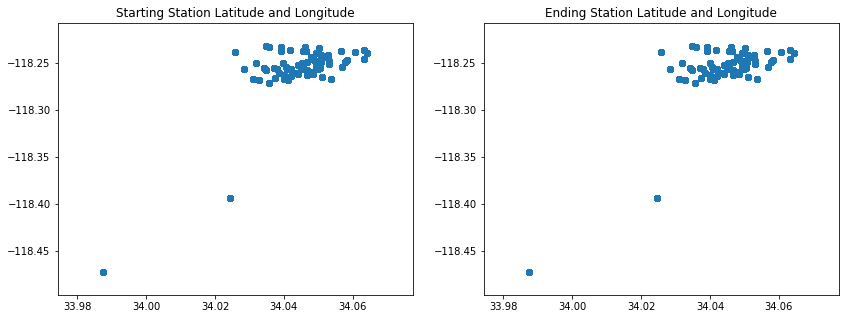

In [16]:
plt.figure(figsize=(14,5))
plt.subplot(1,2,1)
plt.scatter(df['Starting Station Latitude'],df['Starting Station Longitude'],alpha=0.3)
plt.title("Starting Station Latitude and Longitude")
plt.subplot(1,2,2)
plt.scatter(df['Ending Station Latitude'],df['Ending Station Longitude'],alpha=0.3)
plt.title("Ending Station Latitude and Longitude")
plt.show()

Matching plots indicate there are no start points that had no drop off and vice-versa this would seem logical

In [17]:
sorted(df['Starting Station ID'].unique())==sorted(df['Ending Station ID'].unique())

True

This confirms that the Starting and Ending Stations sets are identical as expected

Now would a great time for a map!

In [1]:
import folium
bike_map1=folium.Map([df['Starting Station Latitude'].values[0],df['Starting Station Longitude'].values[0]])
for station in df['Starting Station ID'].unique():
    lat=df.loc[df['Starting Station ID']==station]['Starting Station Latitude'].values[0]
    lon=df.loc[df['Starting Station ID']==station]['Starting Station Longitude'].values[0]
    marker=folium.Marker([lat,lon],popup=str(station))
    marker.add_to(bike_map1)

bike_map1

NameError: name 'df' is not defined

Almost all the Bike Stations are located in Downtown LA with the exception of 2; 1 in Culver City(id = 3039), and 1 in Venice (id = 3009)

Lets look closer at the traffic to and from these 2 outlying bike stations, are they outliers?

In [103]:
df.loc[df['Starting Station ID']==3039]['Ending Station ID'].value_counts()

3039.0    77
3009.0    35
Name: Ending Station ID, dtype: int64

In [104]:
df.loc[df['Ending Station ID']==3039]['Starting Station ID'].value_counts()

3039.0    77
3009.0    26
3064.0     6
3005.0     2
3052.0     1
Name: Starting Station ID, dtype: int64

In [105]:
df.loc[df['Starting Station ID']==3009]['Ending Station ID'].value_counts()

3039.0    26
3009.0    25
Name: Ending Station ID, dtype: int64

In [106]:
df.loc[df['Ending Station ID']==3009]['Starting Station ID'].value_counts()

3039.0    35
3009.0    25
3011.0     1
3027.0     1
3005.0     1
3042.0     1
Name: Starting Station ID, dtype: int64

Almost all of the trips made to and from these bike stations are either round trips to the same place or from one of the two to the other. These two stations are almost completely disconnected from the Downtown LA network.

They also only account for a very tiny fraction of the rides total; from over 130k rides just 163 are to or from these two stations, I wonder why that is?

In [107]:
print('The first trip made FROM bike Station 3039 (Culver City) was on : ',df.loc[df['Starting Station ID']==3039]['Start Time'].min())
print('The last trip made FROM bike Station 3039 (Culver City) was on : ',df.loc[df['Starting Station ID']==3039]['Start Time'].max())
print('The first trip made FROM bike Station 3009 (Venice) was on : ',df.loc[df['Starting Station ID']==3009]['Start Time'].min())
print('The last trip made FROM bike Station 309 (Venice) was on : ',df.loc[df['Starting Station ID']==3009]['Start Time'].max())

print('The first trip made TO bike Station 3039 (Culver City) was on : ',df.loc[df['Ending Station ID']==3039]['Start Time'].min())
print('The last trip made TO bike Station 3039 (Culver City) was on : ',df.loc[df['Ending Station ID']==3039]['Start Time'].max())
print('The first trip made TO bike Station 3009 (Venice) was on : ',df.loc[df['Ending Station ID']==3009]['Start Time'].min())
print('The last trip made TO bike Station 309 (Venice) was on : ',df.loc[df['Ending Station ID']==3009]['Start Time'].max())

The first trip made FROM bike Station 3039 (Culver City) was on :  2017-03-26 07:30:00
The last trip made FROM bike Station 3039 (Culver City) was on :  2017-03-26 15:06:00
The first trip made FROM bike Station 3009 (Venice) was on :  2017-03-26 08:30:00
The last trip made FROM bike Station 309 (Venice) was on :  2017-03-26 15:31:00
The first trip made TO bike Station 3039 (Culver City) was on :  2017-03-26 07:30:00
The last trip made TO bike Station 3039 (Culver City) was on :  2017-03-26 15:31:00
The first trip made TO bike Station 3009 (Venice) was on :  2017-03-26 07:45:00
The last trip made TO bike Station 309 (Venice) was on :  2017-03-26 14:11:00


All these the trips to and from Culver City and Venice are on the same day; 2017-03-26 which is the last weekend day of the dataset. What may be the case is that this station was only operational beginning that day (or that weekend)so it was only  used on the sunday by people going to and from the beach but these new stations were not used during the week as part of anyone's regular commute. Atl least not yet.

Lets explore some of the distinctive characteristics of these other Bike Stations further:

In [108]:
df['Starting Station ID'].value_counts().tail(10)

3020.0    522
3010.0    420
3060.0    379
3057.0    371
3080.0    189
3045.0    185
3039.0    112
4108.0     53
3009.0     51
3053.0     15
Name: Starting Station ID, dtype: int64

In [109]:
df['Ending Station ID'].value_counts().tail(10)

3028.0    516
3010.0    406
3057.0    398
3060.0    390
3045.0    319
3080.0    173
3039.0    112
4108.0     70
3009.0     64
3053.0     12
Name: Ending Station ID, dtype: int64

Bike Station 4108, which was our station with the apparent logging errors, also has relatively few trips to and from it, from the map it is a little separated from the rest of the downtown set

In [110]:
df.loc[df['Starting Station ID']==4108]['Trip Route Category'].value_counts(normalize=True)

Round Trip    0.735849
One Way       0.264151
Name: Trip Route Category, dtype: float64

In [111]:
df.loc[df['Ending Station ID']==4108]['Trip Route Category'].value_counts(normalize=True)

Round Trip    0.557143
One Way       0.442857
Name: Trip Route Category, dtype: float64

Bike Station ID 4108 is dominantly Round-Trip traffic, this is very unusual for this dataset! 

Bike Station 3053 has the least number of rides to and from it but it appears to be right in the mix of things

In [112]:
df.loc[df['Starting Station ID']==3053]['Start Time']

Trip ID
2137435   2016-07-09 12:42:00
2057407   2016-07-08 17:46:00
2419835   2016-07-11 07:50:00
2057407   2016-07-08 17:46:00
2419835   2016-07-11 07:50:00
2116360   2016-07-09 07:12:00
2321036   2016-07-10 17:42:00
2419838   2016-07-11 07:32:00
2335086   2016-07-10 15:41:00
2019541   2016-07-08 08:39:00
2176181   2016-07-09 19:11:00
2314140   2016-07-10 15:18:00
2062197   2016-07-08 18:22:00
2169928   2016-07-09 18:40:00
2137436   2016-07-09 12:42:00
Name: Start Time, dtype: datetime64[ns]

In [113]:
df.loc[df['Ending Station ID']==3053]['Start Time']

Trip ID
2067007   2016-07-08 19:03:00
2152686   2016-07-09 15:49:00
2066991   2016-07-08 19:33:00
2158281   2016-07-09 16:35:00
2188763   2016-07-09 21:37:00
2426970   2016-07-11 08:05:00
2158278   2016-07-09 16:36:00
2280145   2016-07-10 10:58:00
2170049   2016-07-09 17:50:00
2116315   2016-07-09 07:36:00
1947931   2016-07-07 13:51:00
2188775   2016-07-09 20:55:00
Name: Start Time, dtype: datetime64[ns]

In [114]:
print('The first trip made FROM bike Station 3053 was on : ',df.loc[df['Starting Station ID']==3053]['Start Time'].min())
print('The last trip made FROM bike Station 3053 was on : ',df.loc[df['Starting Station ID']==3053]['Start Time'].max())
print('The first trip made TO bike Station 3053 was on : ',df.loc[df['Ending Station ID']==3053]['Start Time'].min())
print('The last trip made TO bike Station 30053 was on : ',df.loc[df['Ending Station ID']==3053]['Start Time'].max())

The first trip made FROM bike Station 3053 was on :  2016-07-08 08:39:00
The last trip made FROM bike Station 3053 was on :  2016-07-11 07:50:00
The first trip made TO bike Station 3053 was on :  2016-07-07 13:51:00
The last trip made TO bike Station 30053 was on :  2016-07-11 08:05:00


All trips made over just 5 days from the 7th of July 2016 (the first day of the dataset) to the 11th of July 2016. Is it possible this Bike Station was decomissioned? 

### Time Series Investigation & Visualisation

In [115]:
df['Start Time'].min()

Timestamp('2016-07-07 04:17:00')

In [116]:
df['Start Time'].max()

Timestamp('2017-03-31 23:45:00')

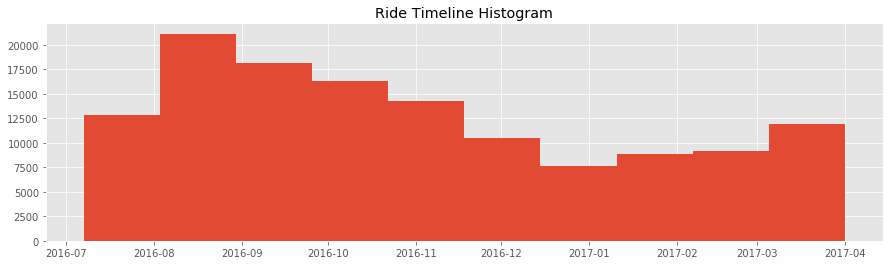

In [117]:
df['Start Time'].hist(figsize=(15,4))
plt.title('Ride Timeline Histogram')
plt.show()

Rides data is assumed to be complete over the timeperiod starting from the 7th of July 2016 to the 31st of March 2017. In the above histogram we can see the growth in popularity over the summer months. Ridership declines as summer turns into autumn turns into winter dropping to its lowest point in wht we would expect to be the coldest part of winter of 2017 and the nincreasing as spring begins to arrive. Unfortunately the time period encompasses less than 1 year so we are unable to observe a full cyclical seasonality on ridership

In [118]:
df['Start Month']=df['Start Time'].dt.month_name()

df['Start Month'].value_counts()

August       24148
September    19861
October      17863
November     14196
March        13564
July         11430
December     10327
January      10053
February      9273
Name: Start Month, dtype: int64

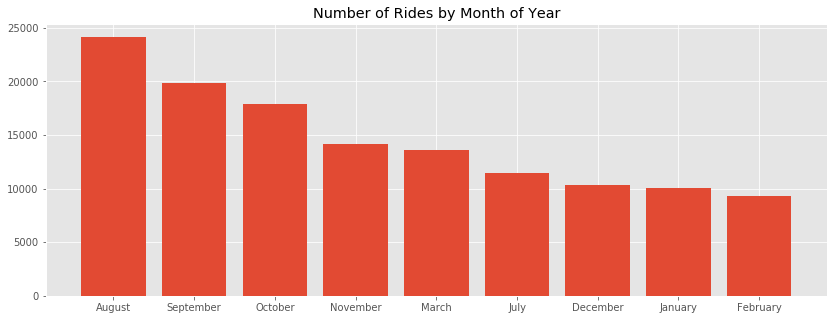

In [121]:
plt.figure(figsize=(14,5))
plt.bar(df['Start Month'].value_counts().index,df['Start Month'].value_counts().values)
plt.title('Number of Rides by Month of Year')
plt.show()

In [122]:
df['Start Day']=df['Start Time'].dt.day_name()
df['Start Day'].value_counts()

Thursday     20087
Friday       19791
Wednesday    19551
Tuesday      18918
Saturday     18279
Monday       17045
Sunday       17044
Name: Start Day, dtype: int64

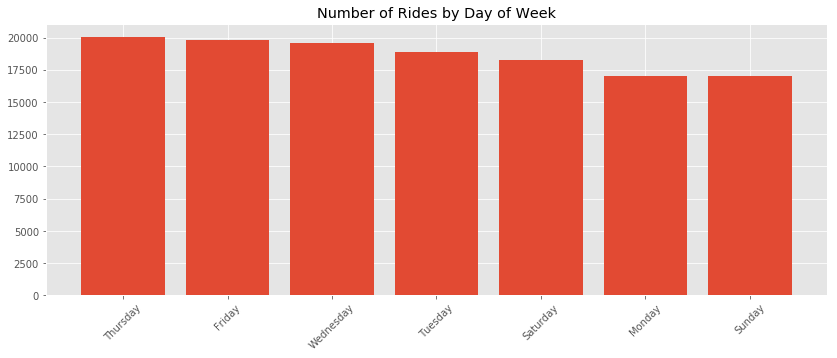

In [123]:
plt.figure(figsize=(14,5))

plt.bar(df['Start Day'].value_counts().index,df['Start Day'].value_counts().values)
plt.xticks(rotation=45)
plt.title('Number of Rides by Day of Week')
plt.show()

Ridership does vary by day of the week but without a clear weekday vs weekend divide

Just the time string data is isolated from the datetime provided in Start Time and is rounded off to the nearest hour to ease our analysis

In [124]:
df['Time Only']= df['Start Time'].dt.round('H')
df['Time Only']=pd.to_datetime(df['Time Only'],format= '%H:%M:%S' ).dt.time
df.head()

,Duration,Start Time,End Time,Starting Station ID,Starting Station Latitude,Starting Station Longitude,Ending Station ID,Ending Station Latitude,Ending Station Longitude,Bike ID,Trip Route Category,Passholder Type,Start Month,Start Day,Time Only
Trip ID,,,,,,,,,,,,,,,
17848847,8.0,2017-01-13 21:32:00,2017-01-13 21:40:00,3082.0,34.046520,-118.237411,3036.0,34.039188,-118.232529,6474.0,One Way,Walk-up,January,Friday,22:00:00
20700706,9.0,2017-02-24 23:13:00,2017-02-24 23:22:00,3029.0,34.048851,-118.246422,3082.0,34.046520,-118.237411,5794.0,One Way,Monthly Pass,February,Friday,23:00:00
20595730,14.0,2017-02-23 07:34:00,2017-02-23 07:48:00,3022.0,34.046070,-118.233093,3005.0,34.048550,-118.259048,6604.0,One Way,Monthly Pass,February,Thursday,08:00:00
17307719,7.0,2017-01-05 12:04:00,2017-01-05 12:11:00,3059.0,34.037949,-118.256271,3038.0,34.046822,-118.248352,6035.0,One Way,Monthly Pass,January,Thursday,12:00:00
18941656,14.0,2017-01-30 20:19:00,2017-01-30 20:33:00,3035.0,34.048401,-118.260948,3040.0,34.053570,-118.266357,6728.0,One Way,Walk-up,January,Monday,20:00:00


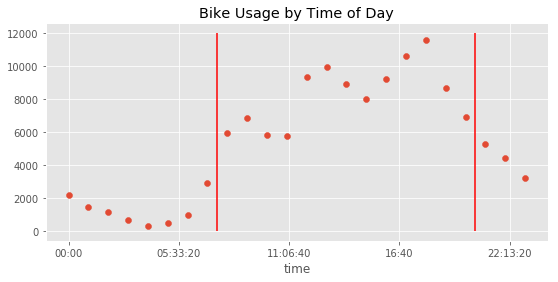

In [125]:
plt.figure(figsize=(9,4))
plt.scatter(df['Time Only'].value_counts().index,df['Time Only'].value_counts().values)
#on peak between the bars
plt.vlines(x='7:30:00',ymin=0,ymax=12000,color='red')
plt.vlines(x='20:30:00',ymin=0,ymax=12000,color='red')
plt.title('Bike Usage by Time of Day')
plt.show()

Across the day, the bike network usage clearly has a peak time seen between the red bars above

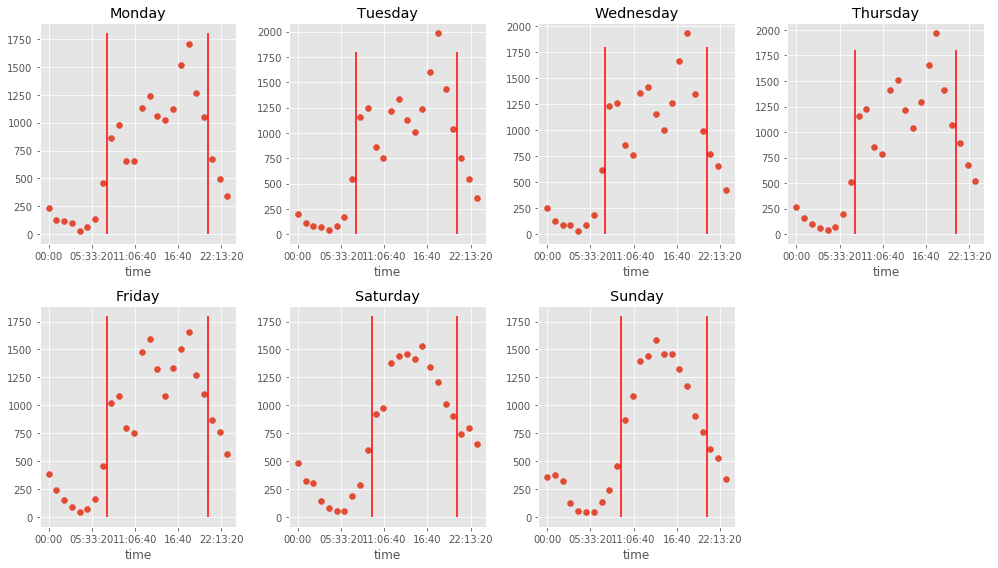

In [126]:
plt.figure(figsize=(14,8))
days=['Monday','Tuesday','Wednesday','Thursday','Friday']
for i in range(len(days)):
    plt.subplot(2,4,i+1)
    plt.scatter(df.loc[df['Start Day'] == days[i]]['Time Only'].value_counts().index,df.loc[df['Start Day'] == days[i]]['Time Only'].value_counts().values)
    plt.title(days[i])
    plt.vlines(x='7:30:00',ymin=0,ymax=1800,color='red')
    plt.vlines(x='20:30:00',ymin=0,ymax=1800,color='red')
    
#Offset peak start by 2 hours for the weekend
plt.subplot(2,4,6)
plt.scatter(df.loc[df['Start Day'] == 'Saturday']['Time Only'].value_counts().index,df.loc[df['Start Day'] == 'Saturday']['Time Only'].value_counts().values)
plt.title('Saturday')
plt.vlines(x='9:30:00',ymin=0,ymax=1800,color='red')
plt.vlines(x='20:30:00',ymin=0,ymax=1800,color='red')

plt.subplot(2,4,7)
plt.scatter(df.loc[df['Start Day'] == 'Sunday']['Time Only'].value_counts().index,df.loc[df['Start Day'] == 'Sunday']['Time Only'].value_counts().values)
plt.title('Sunday')
plt.vlines(x='9:30:00',ymin=0,ymax=1800,color='red')
plt.vlines(x='20:30:00',ymin=0,ymax=1800,color='red')

plt.tight_layout()

People like to sleep in on the weekends, move the start of peak bar up 2 hours on saturday and sunday

We will create a feature called 'Peak' to describe this On-Peak vs Off-Peak difference and a feature called 'Time Only Int' to simplify our Start Time for later usage

In [127]:
def to_hour_int(x):
    #convert hh:mm:ss to hh integar
    x=str(x)
    x=x[:2]
    x=int(x)
    return x

In [128]:
df['Time Only Int']=df['Time Only']
df['Time Only Int']=df['Time Only Int'].astype('str')
df['Time Only Int']=df['Time Only Int'].apply(lambda x: to_hour_int(x))

In [129]:
df['Peak']=1
df.loc[df['Time Only Int']>20.5,'Peak']=0
df.loc[df['Time Only Int']<7.5,'Peak']=0
df.loc[(df['Start Day']=='Saturday')&(df['Time Only Int']<9.5),'Peak']=0
df.loc[(df['Start Day']=='Sunday')&(df['Time Only Int']<9.5),'Peak']=0

df['Peak'].describe()

count    130715.000000
mean          0.811850
std           0.390833
min           0.000000
25%           1.000000
50%           1.000000
75%           1.000000
max           1.000000
Name: Peak, dtype: float64

1    0.81185
0    0.18815
Name: Peak, dtype: float64


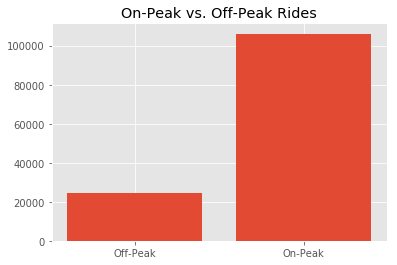

In [130]:
print(df.Peak.value_counts(normalize=True))
plt.bar(df.Peak.value_counts().index,df.Peak.value_counts().values)
plt.xticks(ticks=[0,1],labels=['Off-Peak','On-Peak'])
plt.title('On-Peak vs. Off-Peak Rides')
plt.show()

In [131]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 130715 entries, 17848847 to 5250466
Data columns (total 17 columns):
Duration                      130715 non-null float64
Start Time                    130715 non-null datetime64[ns]
End Time                      130715 non-null datetime64[ns]
Starting Station ID           130715 non-null float64
Starting Station Latitude     130715 non-null float64
Starting Station Longitude    130715 non-null float64
Ending Station ID             130715 non-null float64
Ending Station Latitude       130715 non-null float64
Ending Station Longitude      130715 non-null float64
Bike ID                       130715 non-null float64
Trip Route Category           130715 non-null object
Passholder Type               130715 non-null object
Start Month                   130715 non-null object
Start Day                     130715 non-null object
Time Only                     130715 non-null object
Time Only Int                 130715 non-null int64
Peak      

## Ride Duration and Type Investigation

In [85]:
df['Trip Route Category'].value_counts()

One Way       118070
Round Trip     12645
Name: Trip Route Category, dtype: int64

In [86]:
df['Trip Route Category'].value_counts(normalize=True)

One Way       0.903263
Round Trip    0.096737
Name: Trip Route Category, dtype: float64

Over 90% of trips are One Way, the bike is picked up at one Station and ridden to another Station. The rider is getting from one place to another, using the bike as a legit mode of transport

In [87]:
df['Passholder Type'].value_counts()

Monthly Pass    80493
Walk-up         40756
Flex Pass        9466
Name: Passholder Type, dtype: int64

In [88]:
df['Passholder Type'].value_counts(normalize=True)

Monthly Pass    0.615790
Walk-up         0.311793
Flex Pass       0.072417
Name: Passholder Type, dtype: float64

Monthly Pass holder make the majority of rides in LA Metro bike Share Network by a noticeable margin. By taking up a recurring monthly subscription they are well committed to the bike share network

In [89]:
df['Plan Duration'].value_counts()

30.0     80493
0.0      40756
365.0     9466
Name: Plan Duration, dtype: int64

Plan Duration and Passholder Type appear to be displaying the same data in 2 different fashions
30 == Monthly Pass 
0 == Walk-up
365 == Flex Pass
Having this feature exist twice is unnecessary, so lets drop Plan Duration



In [90]:
df.drop(columns=['Plan Duration'],inplace=True)

In [91]:
len(df['Bike ID'].unique())

762

762 individual bikes in the system

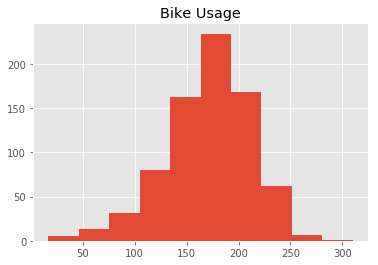

In [92]:
df['Bike ID'].value_counts().hist()
plt.title('Bike Usage')
plt.show()

Distribution of Bike usage appears normal indicating the bikes are all used randomly. This is to be expected but we can also expect the particular bike ridden to be of little use to our machine learning models

In [132]:
df.groupby('Trip Route Category')['Duration'].describe()

,count,mean,std,min,25%,50%,75%,max
Trip Route Category,,,,,,,,
One Way,118070.0,19.119870,69.338844,1.0,6.0,10.0,16.0,1440.0
Round Trip,12645.0,54.962198,128.778401,1.0,15.0,28.0,53.0,1440.0


Round Trips tend to be significantly longer rides

In [133]:
df.groupby('Passholder Type')['Duration'].describe()

,count,mean,std,min,25%,50%,75%,max
Passholder Type,,,,,,,,
Flex Pass,9466.0,17.804775,63.565957,1.0,7.0,10.0,15.0,1440.0
Monthly Pass,80493.0,12.938119,41.715014,1.0,5.0,8.0,13.0,1440.0
Walk-up,40756.0,42.754735,120.260342,1.0,11.0,19.0,34.0,1440.0


Monthly Pass Holder tend to take much shorter rides  but take many more of them. An excellent indication of a low barrier to riding. Walk up riders that only use the bike share system occasionally tend to take longer rides, this would be the type of pass Iespect to be held by a tourist, leisurely riding around downtown LA

In [134]:
df.groupby('Passholder Type')['Trip Route Category'].value_counts(normalize=True)

Passholder Type  Trip Route Category
Flex Pass        One Way                0.948658
                 Round Trip             0.051342
Monthly Pass     One Way                0.953984
                 Round Trip             0.046016
Walk-up          One Way                0.792546
                 Round Trip             0.207454
Name: Trip Route Category, dtype: float64

In [135]:
df.groupby('Peak')['Duration'].describe()

,count,mean,std,min,25%,50%,75%,max
Peak,,,,,,,,
0,24594.0,27.888672,98.299233,1.0,6.0,11.0,19.0,1440.0
1,106121.0,21.358506,72.222643,1.0,6.0,10.0,17.0,1440.0


In [136]:
df.groupby('Peak')['Trip Route Category'].value_counts(normalize=True)

Peak  Trip Route Category
0     One Way                0.878954
      Round Trip             0.121046
1     One Way                0.908896
      Round Trip             0.091104
Name: Trip Route Category, dtype: float64

In [137]:
df.groupby('Peak')['Passholder Type'].value_counts(normalize=True)

Peak  Passholder Type
0     Monthly Pass       0.555583
      Walk-up            0.381475
      Flex Pass          0.062942
1     Monthly Pass       0.629743
      Walk-up            0.295644
      Flex Pass          0.074613
Name: Passholder Type, dtype: float64

Interestingly On-Peak and Off-Peak riding times did not see a difference in ride Duration or Trip Route Category. 
The proportion of Monthly Pass holders riding is higher during On-Peak hours and Walk-Up riders are a higher proportion of Off-Peak riders. 

In [138]:
df.Duration.value_counts(normalize=True).head(10)


6.0     0.072807
7.0     0.071423
5.0     0.068378
8.0     0.067666
9.0     0.058647
4.0     0.055816
10.0    0.053353
11.0    0.046827
12.0    0.041434
13.0    0.037019
Name: Duration, dtype: float64

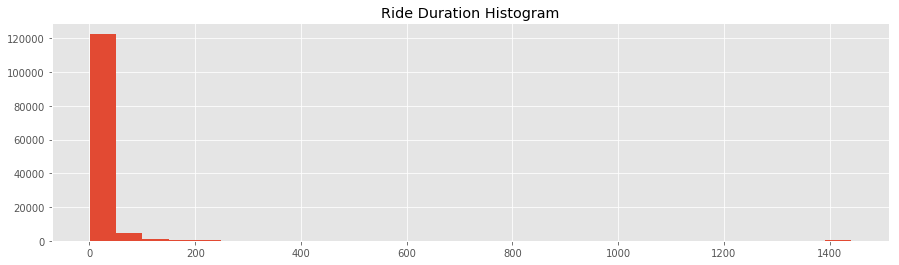

In [139]:
plt.figure(figsize=(15,4))
df.Duration.hist(bins=29)
plt.title('Ride Duration Histogram')
plt.show()

Ride Duration is very heavily left skewed, most rides are very short but there is a very long tail out to a max of 1440 minutes which is rides lasting longer than a full day

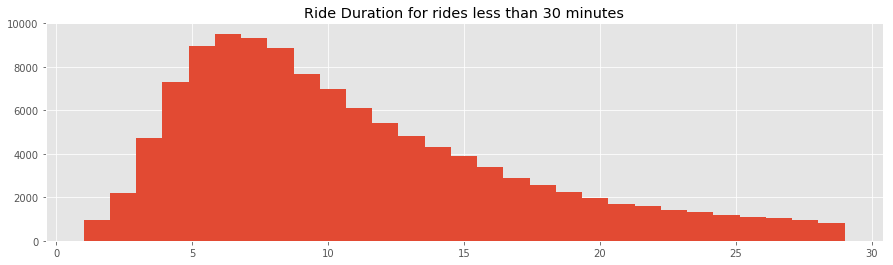

In [140]:
plt.figure(figsize=(15,4))
df.loc[df['Duration']<30].Duration.hist(bins=29)
plt.title('Ride Duration for rides less than 30 minutes')
plt.show()

In [141]:
round(len(df.loc[df.Duration<31])/len(df),2)

0.89

89% of rides are 30 minutes or less. All rides longer than 30 minutes will be rounded down to 30 to prevent the long tail from exerting undue influence on our machine learning models.

In [142]:
df['Duration']=df['Duration'].clip(upper=30)

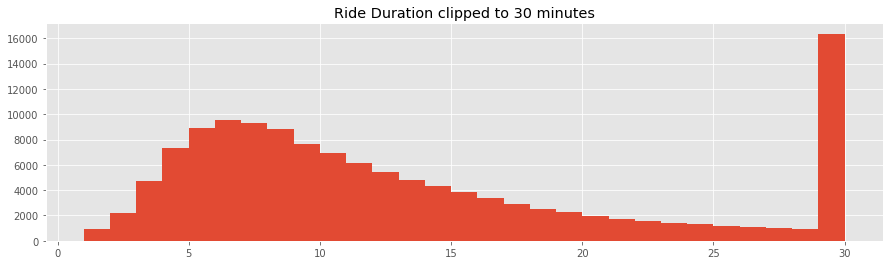

In [143]:
plt.figure(figsize=(15,4))
df.Duration.hist(bins=29)
plt.title('Ride Duration clipped to 30 minutes')
plt.show()
# plt.vlines(x=15,ymin=0,ymax=10000,color='red')
# plt.vlines(x=10,ymin=0,ymax=10000,color='red')
# plt.vlines(x=5,ymin=0,ymax=10000,color='red')
# plt.ylim(0,30000)
# plt.xlim(0,5000)

### Classifier Model for Passholder Type

Can we predict what kind of membership the ride taker holds?

There are multiple types of network membership and each are bound to attract riders with different wants or expectations. An understanding of how and why these riders fit into these particular categories is invaluable for understanding rider behaviour attracting new riders and ultimately growing the LA bike share network.

In [230]:
df.columns

Index(['Duration', 'Start Time', 'End Time', 'Starting Station ID',
       'Starting Station Latitude', 'Starting Station Longitude',
       'Ending Station ID', 'Ending Station Latitude',
       'Ending Station Longitude', 'Bike ID', 'Trip Route Category',
       'Passholder Type', 'Start Month', 'Start Day', 'Time Only',
       'Time Only Int', 'Peak'],
      dtype='object')

In [161]:
y=df['Passholder Type']
X=df.drop(columns=['Bike ID','Time Only','Start Time','End Time','Passholder Type'])

In [162]:
X['Starting Station ID']=X['Starting Station ID'].astype('str')
X['Ending Station ID']=X['Ending Station ID'].astype('str')


Categorical features are one-hot encoded, all features are scaled and dimensionality is reduced

In [163]:
X=pd.get_dummies(X)

In [164]:
X.shape

(130715, 157)

In [165]:
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()
scaler.fit_transform(X)

C:\Users\kosta\Anaconda3\envs\learn-env\lib\site-packages\sklearn\preprocessing\data.py:625: DataConversionWarning: Data with input dtype uint8, int64, float64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
C:\Users\kosta\Anaconda3\envs\learn-env\lib\site-packages\sklearn\base.py:462: DataConversionWarning: Data with input dtype uint8, int64, float64 were all converted to float64 by StandardScaler.
  return self.fit(X, **fit_params).transform(X)


array([[-0.5903835 , -0.16140359,  1.10770092, ..., -0.42611322,
        -0.41136045, -0.41937487],
       [-0.47384103,  0.20523359,  0.32241175, ..., -0.42611322,
        -0.41136045, -0.41937487],
       [ 0.10887135, -0.23218297,  1.48400529, ...,  2.34679412,
        -0.41136045, -0.41937487],
       ...,
       [ 1.39083857,  1.42564309,  1.12521764, ..., -0.42611322,
        -0.41136045, -0.41937487],
       [-0.00767113, -1.31457267,  1.53306953, ..., -0.42611322,
        -0.41136045, -0.41937487],
       [-0.94001093,  0.86104385,  0.18924985, ..., -0.42611322,
         2.43095805, -0.41937487]])

[71.3857058708633, 24.75791639117819, 0.17116505519736155, 0.15646279107469624, 0.14964004930898522]
100.00000000000013


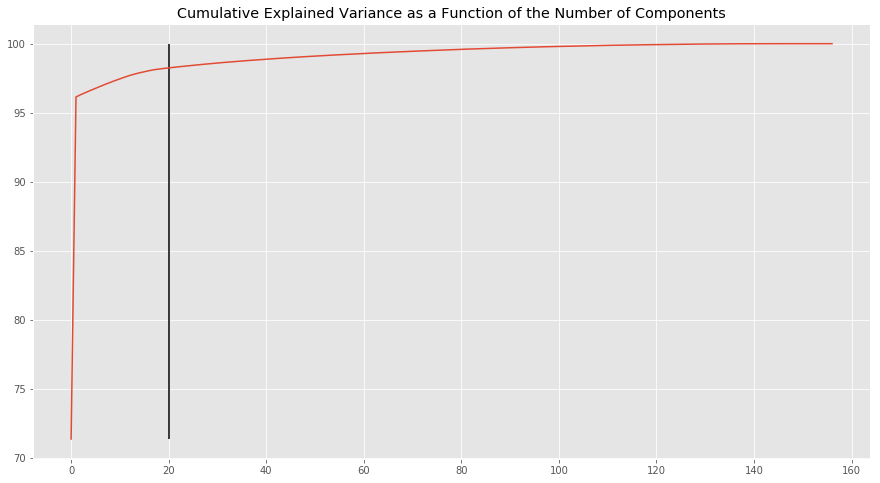

In [166]:
from sklearn.decomposition import PCA
pca=PCA()
pca.fit(X)
tot = sum(pca.explained_variance_)
var_exp = [(i/tot)*100 for i in sorted(pca.explained_variance_, reverse=True)] 
print(var_exp[0:5])
print(sum(var_exp))
cum_var_exp = np.cumsum(var_exp) 
plt.style.use('ggplot')
plt.figure(figsize=(15, 8))
plt.plot(cum_var_exp)
plt.title('Cumulative Explained Variance as a Function of the Number of Components')
plt.vlines(x=20,ymin=var_exp[0],ymax=100)

Approximately 98% of variance retained using 20 variables

In [167]:
pca=PCA(n_components=20)
pca.fit(X)

PCA(copy=True, iterated_power='auto', n_components=20, random_state=None,
  svd_solver='auto', tol=0.0, whiten=False)

In [168]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y)

In [169]:
X_train=pca.transform(X_train)
X_test=pca.transform(X_test)

In [170]:
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestClassifier
param_grid_rfc={'n_estimators':[10,100],
                'criterion': ['entropy', 'gini'], 
                'max_depth': [2, 5, 10, None],  
                'min_samples_leaf':[0.05 ,0.1, 0.2], 
                'min_samples_split':[0.05 ,0.1, 0.2]}
grid_rfc=GridSearchCV(estimator=RandomForestClassifier(),
                     param_grid=param_grid_rfc,
                     cv=3,
                     verbose=2)
grid_rfc.fit(X_train,y_train)

Fitting 3 folds for each of 144 candidates, totalling 432 fits
[CV] criterion=entropy, max_depth=2, min_samples_leaf=0.05, min_samples_split=0.05, n_estimators=10 


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


[CV]  criterion=entropy, max_depth=2, min_samples_leaf=0.05, min_samples_split=0.05, n_estimators=10, total=   0.7s
[CV] criterion=entropy, max_depth=2, min_samples_leaf=0.05, min_samples_split=0.05, n_estimators=10 


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.8s remaining:    0.0s


[CV]  criterion=entropy, max_depth=2, min_samples_leaf=0.05, min_samples_split=0.05, n_estimators=10, total=   0.6s
[CV] criterion=entropy, max_depth=2, min_samples_leaf=0.05, min_samples_split=0.05, n_estimators=10 
[CV]  criterion=entropy, max_depth=2, min_samples_leaf=0.05, min_samples_split=0.05, n_estimators=10, total=   0.6s
[CV] criterion=entropy, max_depth=2, min_samples_leaf=0.05, min_samples_split=0.05, n_estimators=100 
[CV]  criterion=entropy, max_depth=2, min_samples_leaf=0.05, min_samples_split=0.05, n_estimators=100, total=   6.2s
[CV] criterion=entropy, max_depth=2, min_samples_leaf=0.05, min_samples_split=0.05, n_estimators=100 
[CV]  criterion=entropy, max_depth=2, min_samples_leaf=0.05, min_samples_split=0.05, n_estimators=100, total=   6.2s
[CV] criterion=entropy, max_depth=2, min_samples_leaf=0.05, min_samples_split=0.05, n_estimators=100 
[CV]  criterion=entropy, max_depth=2, min_samples_leaf=0.05, min_samples_split=0.05, n_estimators=100, total=   6.2s
[CV] crite

[CV]  criterion=entropy, max_depth=2, min_samples_leaf=0.2, min_samples_split=0.05, n_estimators=100, total=   3.5s
[CV] criterion=entropy, max_depth=2, min_samples_leaf=0.2, min_samples_split=0.05, n_estimators=100 
[CV]  criterion=entropy, max_depth=2, min_samples_leaf=0.2, min_samples_split=0.05, n_estimators=100, total=   3.6s
[CV] criterion=entropy, max_depth=2, min_samples_leaf=0.2, min_samples_split=0.1, n_estimators=10 
[CV]  criterion=entropy, max_depth=2, min_samples_leaf=0.2, min_samples_split=0.1, n_estimators=10, total=   0.4s
[CV] criterion=entropy, max_depth=2, min_samples_leaf=0.2, min_samples_split=0.1, n_estimators=10 
[CV]  criterion=entropy, max_depth=2, min_samples_leaf=0.2, min_samples_split=0.1, n_estimators=10, total=   0.4s
[CV] criterion=entropy, max_depth=2, min_samples_leaf=0.2, min_samples_split=0.1, n_estimators=10 
[CV]  criterion=entropy, max_depth=2, min_samples_leaf=0.2, min_samples_split=0.1, n_estimators=10, total=   0.4s
[CV] criterion=entropy, max_

[CV]  criterion=entropy, max_depth=5, min_samples_leaf=0.1, min_samples_split=0.1, n_estimators=10, total=   0.7s
[CV] criterion=entropy, max_depth=5, min_samples_leaf=0.1, min_samples_split=0.1, n_estimators=10 
[CV]  criterion=entropy, max_depth=5, min_samples_leaf=0.1, min_samples_split=0.1, n_estimators=10, total=   0.8s
[CV] criterion=entropy, max_depth=5, min_samples_leaf=0.1, min_samples_split=0.1, n_estimators=10 
[CV]  criterion=entropy, max_depth=5, min_samples_leaf=0.1, min_samples_split=0.1, n_estimators=10, total=   0.7s
[CV] criterion=entropy, max_depth=5, min_samples_leaf=0.1, min_samples_split=0.1, n_estimators=100 
[CV]  criterion=entropy, max_depth=5, min_samples_leaf=0.1, min_samples_split=0.1, n_estimators=100, total=   6.8s
[CV] criterion=entropy, max_depth=5, min_samples_leaf=0.1, min_samples_split=0.1, n_estimators=100 
[CV]  criterion=entropy, max_depth=5, min_samples_leaf=0.1, min_samples_split=0.1, n_estimators=100, total=   6.9s
[CV] criterion=entropy, max_de

[CV]  criterion=entropy, max_depth=10, min_samples_leaf=0.05, min_samples_split=0.1, n_estimators=100, total=  11.0s
[CV] criterion=entropy, max_depth=10, min_samples_leaf=0.05, min_samples_split=0.1, n_estimators=100 
[CV]  criterion=entropy, max_depth=10, min_samples_leaf=0.05, min_samples_split=0.1, n_estimators=100, total=  10.8s
[CV] criterion=entropy, max_depth=10, min_samples_leaf=0.05, min_samples_split=0.1, n_estimators=100 
[CV]  criterion=entropy, max_depth=10, min_samples_leaf=0.05, min_samples_split=0.1, n_estimators=100, total=  10.8s
[CV] criterion=entropy, max_depth=10, min_samples_leaf=0.05, min_samples_split=0.2, n_estimators=10 
[CV]  criterion=entropy, max_depth=10, min_samples_leaf=0.05, min_samples_split=0.2, n_estimators=10, total=   1.0s
[CV] criterion=entropy, max_depth=10, min_samples_leaf=0.05, min_samples_split=0.2, n_estimators=10 
[CV]  criterion=entropy, max_depth=10, min_samples_leaf=0.05, min_samples_split=0.2, n_estimators=10, total=   1.0s
[CV] criter

[CV]  criterion=entropy, max_depth=10, min_samples_leaf=0.2, min_samples_split=0.1, n_estimators=100, total=   3.5s
[CV] criterion=entropy, max_depth=10, min_samples_leaf=0.2, min_samples_split=0.2, n_estimators=10 
[CV]  criterion=entropy, max_depth=10, min_samples_leaf=0.2, min_samples_split=0.2, n_estimators=10, total=   0.3s
[CV] criterion=entropy, max_depth=10, min_samples_leaf=0.2, min_samples_split=0.2, n_estimators=10 
[CV]  criterion=entropy, max_depth=10, min_samples_leaf=0.2, min_samples_split=0.2, n_estimators=10, total=   0.3s
[CV] criterion=entropy, max_depth=10, min_samples_leaf=0.2, min_samples_split=0.2, n_estimators=10 
[CV]  criterion=entropy, max_depth=10, min_samples_leaf=0.2, min_samples_split=0.2, n_estimators=10, total=   0.4s
[CV] criterion=entropy, max_depth=10, min_samples_leaf=0.2, min_samples_split=0.2, n_estimators=100 
[CV]  criterion=entropy, max_depth=10, min_samples_leaf=0.2, min_samples_split=0.2, n_estimators=100, total=   3.4s
[CV] criterion=entropy

[CV]  criterion=entropy, max_depth=None, min_samples_leaf=0.1, min_samples_split=0.2, n_estimators=10, total=   0.8s
[CV] criterion=entropy, max_depth=None, min_samples_leaf=0.1, min_samples_split=0.2, n_estimators=10 
[CV]  criterion=entropy, max_depth=None, min_samples_leaf=0.1, min_samples_split=0.2, n_estimators=10, total=   0.7s
[CV] criterion=entropy, max_depth=None, min_samples_leaf=0.1, min_samples_split=0.2, n_estimators=100 
[CV]  criterion=entropy, max_depth=None, min_samples_leaf=0.1, min_samples_split=0.2, n_estimators=100, total=   6.8s
[CV] criterion=entropy, max_depth=None, min_samples_leaf=0.1, min_samples_split=0.2, n_estimators=100 
[CV]  criterion=entropy, max_depth=None, min_samples_leaf=0.1, min_samples_split=0.2, n_estimators=100, total=   7.0s
[CV] criterion=entropy, max_depth=None, min_samples_leaf=0.1, min_samples_split=0.2, n_estimators=100 
[CV]  criterion=entropy, max_depth=None, min_samples_leaf=0.1, min_samples_split=0.2, n_estimators=100, total=   6.9s
[

[CV]  criterion=gini, max_depth=2, min_samples_leaf=0.05, min_samples_split=0.2, n_estimators=100, total=   4.1s
[CV] criterion=gini, max_depth=2, min_samples_leaf=0.05, min_samples_split=0.2, n_estimators=100 
[CV]  criterion=gini, max_depth=2, min_samples_leaf=0.05, min_samples_split=0.2, n_estimators=100, total=   4.1s
[CV] criterion=gini, max_depth=2, min_samples_leaf=0.05, min_samples_split=0.2, n_estimators=100 
[CV]  criterion=gini, max_depth=2, min_samples_leaf=0.05, min_samples_split=0.2, n_estimators=100, total=   4.0s
[CV] criterion=gini, max_depth=2, min_samples_leaf=0.1, min_samples_split=0.05, n_estimators=10 
[CV]  criterion=gini, max_depth=2, min_samples_leaf=0.1, min_samples_split=0.05, n_estimators=10, total=   0.4s
[CV] criterion=gini, max_depth=2, min_samples_leaf=0.1, min_samples_split=0.05, n_estimators=10 
[CV]  criterion=gini, max_depth=2, min_samples_leaf=0.1, min_samples_split=0.05, n_estimators=10, total=   0.4s
[CV] criterion=gini, max_depth=2, min_samples_l

[CV]  criterion=gini, max_depth=5, min_samples_leaf=0.05, min_samples_split=0.05, n_estimators=10, total=   0.7s
[CV] criterion=gini, max_depth=5, min_samples_leaf=0.05, min_samples_split=0.05, n_estimators=10 
[CV]  criterion=gini, max_depth=5, min_samples_leaf=0.05, min_samples_split=0.05, n_estimators=10, total=   0.7s
[CV] criterion=gini, max_depth=5, min_samples_leaf=0.05, min_samples_split=0.05, n_estimators=100 
[CV]  criterion=gini, max_depth=5, min_samples_leaf=0.05, min_samples_split=0.05, n_estimators=100, total=   7.0s
[CV] criterion=gini, max_depth=5, min_samples_leaf=0.05, min_samples_split=0.05, n_estimators=100 
[CV]  criterion=gini, max_depth=5, min_samples_leaf=0.05, min_samples_split=0.05, n_estimators=100, total=   7.0s
[CV] criterion=gini, max_depth=5, min_samples_leaf=0.05, min_samples_split=0.05, n_estimators=100 
[CV]  criterion=gini, max_depth=5, min_samples_leaf=0.05, min_samples_split=0.05, n_estimators=100, total=   7.0s
[CV] criterion=gini, max_depth=5, min

[CV]  criterion=gini, max_depth=5, min_samples_leaf=0.2, min_samples_split=0.05, n_estimators=100, total=   3.0s
[CV] criterion=gini, max_depth=5, min_samples_leaf=0.2, min_samples_split=0.1, n_estimators=10 
[CV]  criterion=gini, max_depth=5, min_samples_leaf=0.2, min_samples_split=0.1, n_estimators=10, total=   0.3s
[CV] criterion=gini, max_depth=5, min_samples_leaf=0.2, min_samples_split=0.1, n_estimators=10 
[CV]  criterion=gini, max_depth=5, min_samples_leaf=0.2, min_samples_split=0.1, n_estimators=10, total=   0.3s
[CV] criterion=gini, max_depth=5, min_samples_leaf=0.2, min_samples_split=0.1, n_estimators=10 
[CV]  criterion=gini, max_depth=5, min_samples_leaf=0.2, min_samples_split=0.1, n_estimators=10, total=   0.3s
[CV] criterion=gini, max_depth=5, min_samples_leaf=0.2, min_samples_split=0.1, n_estimators=100 
[CV]  criterion=gini, max_depth=5, min_samples_leaf=0.2, min_samples_split=0.1, n_estimators=100, total=   3.1s
[CV] criterion=gini, max_depth=5, min_samples_leaf=0.2, m

[CV]  criterion=gini, max_depth=10, min_samples_leaf=0.1, min_samples_split=0.1, n_estimators=10, total=   0.5s
[CV] criterion=gini, max_depth=10, min_samples_leaf=0.1, min_samples_split=0.1, n_estimators=100 
[CV]  criterion=gini, max_depth=10, min_samples_leaf=0.1, min_samples_split=0.1, n_estimators=100, total=   5.0s
[CV] criterion=gini, max_depth=10, min_samples_leaf=0.1, min_samples_split=0.1, n_estimators=100 
[CV]  criterion=gini, max_depth=10, min_samples_leaf=0.1, min_samples_split=0.1, n_estimators=100, total=   5.0s
[CV] criterion=gini, max_depth=10, min_samples_leaf=0.1, min_samples_split=0.1, n_estimators=100 
[CV]  criterion=gini, max_depth=10, min_samples_leaf=0.1, min_samples_split=0.1, n_estimators=100, total=   4.9s
[CV] criterion=gini, max_depth=10, min_samples_leaf=0.1, min_samples_split=0.2, n_estimators=10 
[CV]  criterion=gini, max_depth=10, min_samples_leaf=0.1, min_samples_split=0.2, n_estimators=10, total=   0.5s
[CV] criterion=gini, max_depth=10, min_samples

[CV]  criterion=gini, max_depth=None, min_samples_leaf=0.05, min_samples_split=0.1, n_estimators=100, total=   7.2s
[CV] criterion=gini, max_depth=None, min_samples_leaf=0.05, min_samples_split=0.2, n_estimators=10 
[CV]  criterion=gini, max_depth=None, min_samples_leaf=0.05, min_samples_split=0.2, n_estimators=10, total=   0.7s
[CV] criterion=gini, max_depth=None, min_samples_leaf=0.05, min_samples_split=0.2, n_estimators=10 
[CV]  criterion=gini, max_depth=None, min_samples_leaf=0.05, min_samples_split=0.2, n_estimators=10, total=   0.6s
[CV] criterion=gini, max_depth=None, min_samples_leaf=0.05, min_samples_split=0.2, n_estimators=10 
[CV]  criterion=gini, max_depth=None, min_samples_leaf=0.05, min_samples_split=0.2, n_estimators=10, total=   0.6s
[CV] criterion=gini, max_depth=None, min_samples_leaf=0.05, min_samples_split=0.2, n_estimators=100 
[CV]  criterion=gini, max_depth=None, min_samples_leaf=0.05, min_samples_split=0.2, n_estimators=100, total=   6.2s
[CV] criterion=gini, m

[CV]  criterion=gini, max_depth=None, min_samples_leaf=0.2, min_samples_split=0.2, n_estimators=10, total=   0.3s
[CV] criterion=gini, max_depth=None, min_samples_leaf=0.2, min_samples_split=0.2, n_estimators=100 
[CV]  criterion=gini, max_depth=None, min_samples_leaf=0.2, min_samples_split=0.2, n_estimators=100, total=   3.1s
[CV] criterion=gini, max_depth=None, min_samples_leaf=0.2, min_samples_split=0.2, n_estimators=100 
[CV]  criterion=gini, max_depth=None, min_samples_leaf=0.2, min_samples_split=0.2, n_estimators=100, total=   3.0s
[CV] criterion=gini, max_depth=None, min_samples_leaf=0.2, min_samples_split=0.2, n_estimators=100 
[CV]  criterion=gini, max_depth=None, min_samples_leaf=0.2, min_samples_split=0.2, n_estimators=100, total=   2.9s


[Parallel(n_jobs=1)]: Done 432 out of 432 | elapsed: 24.5min finished


GridSearchCV(cv=3, error_score='raise-deprecating',
       estimator=RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators='warn', n_jobs=None,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False),
       fit_params=None, iid='warn', n_jobs=None,
       param_grid={'n_estimators': [10, 100], 'criterion': ['entropy', 'gini'], 'max_depth': [2, 5, 10, None], 'min_samples_leaf': [0.05, 0.1, 0.2], 'min_samples_split': [0.05, 0.1, 0.2]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring=None, verbose=2)

In [171]:
grid_rfc.best_params_

{'criterion': 'entropy',
 'max_depth': 5,
 'min_samples_leaf': 0.05,
 'min_samples_split': 0.05,
 'n_estimators': 100}

In [172]:
grid_rfc.best_score_

0.724958178628259

In [224]:
from sklearn.metrics import confusion_matrix, classification_report
y_pred = grid_rfc.best_estimator_.predict(X_test)
print(classification_report(y_test,y_pred))

C:\Users\kosta\Anaconda3\envs\learn-env\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


              precision    recall  f1-score   support

   Flex Pass       0.00      0.00      0.00      2348
Monthly Pass       0.72      0.93      0.81     20070
     Walk-up       0.76      0.49      0.59     10261

   micro avg       0.73      0.73      0.73     32679
   macro avg       0.49      0.47      0.47     32679
weighted avg       0.68      0.73      0.68     32679



In [219]:
import itertools
def show_cf(y_true, y_pred, class_names=None, model_name=None):
    '''Stylized Visual Confusion Matrix provided by Flatiron School'''
    cf = confusion_matrix(y_true, y_pred)
    plt.imshow(cf, cmap=plt.cm.Blues)
    
    if model_name:
        plt.title("Confusion Matrix: {}".format(model_name))
    else:
        plt.title("Confusion Matrix")
    plt.ylabel('True Label')
    plt.xlabel('Predicted Label')
    
#     class_names = set(y_true)
    tick_marks = np.arange(len(class_names))
    if class_names:
        plt.xticks(tick_marks, class_names)
        plt.yticks(tick_marks, class_names)
    
    thresh = cf.max() / 2.
    
    for i, j in itertools.product(range(cf.shape[0]), range(cf.shape[1])):
        plt.text(j, i, cf[i, j], horizontalalignment='center', color='white' if cf[i, j] > thresh else 'black')

    plt.colorbar()
    


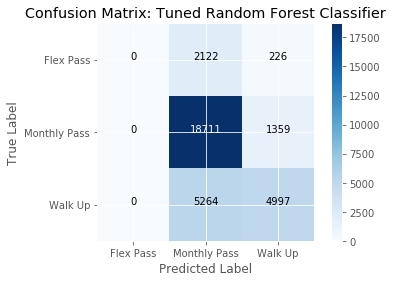

In [225]:
show_cf(y_test,y_pred,class_names=['Flex Pass','Monthly Pass','Walk Up'],model_name='Tuned Random Forest Classifier')

In [174]:
from sklearn.ensemble import AdaBoostClassifier
param_grid_ada={'n_estimators': [30, 50, 70],
                'learning_rate': [1.0, 0.5, 0.1]}
grid_ada=GridSearchCV(estimator=AdaBoostClassifier(),
                     param_grid=param_grid_ada,
                     cv=3,
                     verbose=2)
grid_ada.fit(X_train,y_train)

Fitting 3 folds for each of 9 candidates, totalling 27 fits
[CV] learning_rate=1.0, n_estimators=30 ..............................


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


[CV] ............... learning_rate=1.0, n_estimators=30, total=   7.7s
[CV] learning_rate=1.0, n_estimators=30 ..............................


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    8.0s remaining:    0.0s


[CV] ............... learning_rate=1.0, n_estimators=30, total=   7.8s
[CV] learning_rate=1.0, n_estimators=30 ..............................
[CV] ............... learning_rate=1.0, n_estimators=30, total=   7.7s
[CV] learning_rate=1.0, n_estimators=50 ..............................
[CV] ............... learning_rate=1.0, n_estimators=50, total=  12.8s
[CV] learning_rate=1.0, n_estimators=50 ..............................
[CV] ............... learning_rate=1.0, n_estimators=50, total=  12.8s
[CV] learning_rate=1.0, n_estimators=50 ..............................
[CV] ............... learning_rate=1.0, n_estimators=50, total=  12.8s
[CV] learning_rate=1.0, n_estimators=70 ..............................
[CV] ............... learning_rate=1.0, n_estimators=70, total=  18.1s
[CV] learning_rate=1.0, n_estimators=70 ..............................
[CV] ............... learning_rate=1.0, n_estimators=70, total=  18.1s
[CV] learning_rate=1.0, n_estimators=70 ..............................
[CV] .

[Parallel(n_jobs=1)]: Done  27 out of  27 | elapsed:  6.0min finished


GridSearchCV(cv=3, error_score='raise-deprecating',
       estimator=AdaBoostClassifier(algorithm='SAMME.R', base_estimator=None,
          learning_rate=1.0, n_estimators=50, random_state=None),
       fit_params=None, iid='warn', n_jobs=None,
       param_grid={'n_estimators': [30, 50, 70], 'learning_rate': [1.0, 0.5, 0.1]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring=None, verbose=2)

In [175]:
grid_ada.best_params_

{'learning_rate': 1.0, 'n_estimators': 50}

In [176]:
grid_ada.best_score_

0.731629197437676

In [226]:
y_pred = grid_ada.best_estimator_.predict(X_test)
# print(confusion_matrix(y_test,y_pred))
print(classification_report(y_test,y_pred))

C:\Users\kosta\Anaconda3\envs\learn-env\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


              precision    recall  f1-score   support

   Flex Pass       0.00      0.00      0.00      2348
Monthly Pass       0.75      0.89      0.81     20070
     Walk-up       0.70      0.60      0.65     10261

   micro avg       0.73      0.73      0.73     32679
   macro avg       0.48      0.50      0.49     32679
weighted avg       0.68      0.73      0.70     32679



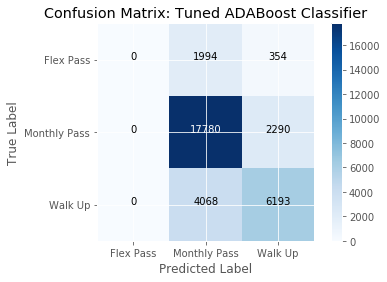

In [227]:
show_cf(y_test,y_pred, class_names=['Flex Pass','Monthly Pass','Walk Up'],model_name='Tuned ADABoost Classifier')

In [178]:
import xgboost as xgb
param_grid_xgb= {
    "learning_rate": [0.3,0.5,0.7],
    'max_depth': [5,6,7],
    'min_child_weight': [0,1,3],
    'n_estimators': [10,100],
}
grid_xgb=GridSearchCV(estimator=xgb.XGBClassifier(),
                      param_grid=param_grid_xgb,
                     cv=3,
                     verbose=2)
grid_xgb.fit(X_train,y_train)


Fitting 3 folds for each of 54 candidates, totalling 162 fits
[CV] learning_rate=0.3, max_depth=5, min_child_weight=0, n_estimators=10 


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


[CV]  learning_rate=0.3, max_depth=5, min_child_weight=0, n_estimators=10, total=   3.3s
[CV] learning_rate=0.3, max_depth=5, min_child_weight=0, n_estimators=10 


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    3.4s remaining:    0.0s


[CV]  learning_rate=0.3, max_depth=5, min_child_weight=0, n_estimators=10, total=   3.2s
[CV] learning_rate=0.3, max_depth=5, min_child_weight=0, n_estimators=10 
[CV]  learning_rate=0.3, max_depth=5, min_child_weight=0, n_estimators=10, total=   3.2s
[CV] learning_rate=0.3, max_depth=5, min_child_weight=0, n_estimators=100 
[CV]  learning_rate=0.3, max_depth=5, min_child_weight=0, n_estimators=100, total=  29.2s
[CV] learning_rate=0.3, max_depth=5, min_child_weight=0, n_estimators=100 
[CV]  learning_rate=0.3, max_depth=5, min_child_weight=0, n_estimators=100, total=  29.7s
[CV] learning_rate=0.3, max_depth=5, min_child_weight=0, n_estimators=100 
[CV]  learning_rate=0.3, max_depth=5, min_child_weight=0, n_estimators=100, total=  29.2s
[CV] learning_rate=0.3, max_depth=5, min_child_weight=1, n_estimators=10 
[CV]  learning_rate=0.3, max_depth=5, min_child_weight=1, n_estimators=10, total=   3.1s
[CV] learning_rate=0.3, max_depth=5, min_child_weight=1, n_estimators=10 
[CV]  learning_r

[CV]  learning_rate=0.3, max_depth=7, min_child_weight=3, n_estimators=100, total=  41.1s
[CV] learning_rate=0.3, max_depth=7, min_child_weight=3, n_estimators=100 
[CV]  learning_rate=0.3, max_depth=7, min_child_weight=3, n_estimators=100, total=  41.2s
[CV] learning_rate=0.3, max_depth=7, min_child_weight=3, n_estimators=100 
[CV]  learning_rate=0.3, max_depth=7, min_child_weight=3, n_estimators=100, total=  41.0s
[CV] learning_rate=0.5, max_depth=5, min_child_weight=0, n_estimators=10 
[CV]  learning_rate=0.5, max_depth=5, min_child_weight=0, n_estimators=10, total=   3.2s
[CV] learning_rate=0.5, max_depth=5, min_child_weight=0, n_estimators=10 
[CV]  learning_rate=0.5, max_depth=5, min_child_weight=0, n_estimators=10, total=   3.2s
[CV] learning_rate=0.5, max_depth=5, min_child_weight=0, n_estimators=10 
[CV]  learning_rate=0.5, max_depth=5, min_child_weight=0, n_estimators=10, total=   3.1s
[CV] learning_rate=0.5, max_depth=5, min_child_weight=0, n_estimators=100 
[CV]  learning_r

[CV]  learning_rate=0.5, max_depth=7, min_child_weight=1, n_estimators=100, total=  41.2s
[CV] learning_rate=0.5, max_depth=7, min_child_weight=3, n_estimators=10 
[CV]  learning_rate=0.5, max_depth=7, min_child_weight=3, n_estimators=10, total=   4.6s
[CV] learning_rate=0.5, max_depth=7, min_child_weight=3, n_estimators=10 
[CV]  learning_rate=0.5, max_depth=7, min_child_weight=3, n_estimators=10, total=   4.6s
[CV] learning_rate=0.5, max_depth=7, min_child_weight=3, n_estimators=10 
[CV]  learning_rate=0.5, max_depth=7, min_child_weight=3, n_estimators=10, total=   4.6s
[CV] learning_rate=0.5, max_depth=7, min_child_weight=3, n_estimators=100 
[CV]  learning_rate=0.5, max_depth=7, min_child_weight=3, n_estimators=100, total=  41.0s
[CV] learning_rate=0.5, max_depth=7, min_child_weight=3, n_estimators=100 
[CV]  learning_rate=0.5, max_depth=7, min_child_weight=3, n_estimators=100, total=  41.2s
[CV] learning_rate=0.5, max_depth=7, min_child_weight=3, n_estimators=100 
[CV]  learning_r

[CV]  learning_rate=0.7, max_depth=7, min_child_weight=1, n_estimators=10, total=   4.5s
[CV] learning_rate=0.7, max_depth=7, min_child_weight=1, n_estimators=10 
[CV]  learning_rate=0.7, max_depth=7, min_child_weight=1, n_estimators=10, total=   4.5s
[CV] learning_rate=0.7, max_depth=7, min_child_weight=1, n_estimators=100 
[CV]  learning_rate=0.7, max_depth=7, min_child_weight=1, n_estimators=100, total=  41.6s
[CV] learning_rate=0.7, max_depth=7, min_child_weight=1, n_estimators=100 
[CV]  learning_rate=0.7, max_depth=7, min_child_weight=1, n_estimators=100, total=  41.3s
[CV] learning_rate=0.7, max_depth=7, min_child_weight=1, n_estimators=100 
[CV]  learning_rate=0.7, max_depth=7, min_child_weight=1, n_estimators=100, total=  41.6s
[CV] learning_rate=0.7, max_depth=7, min_child_weight=3, n_estimators=10 
[CV]  learning_rate=0.7, max_depth=7, min_child_weight=3, n_estimators=10, total=   4.4s
[CV] learning_rate=0.7, max_depth=7, min_child_weight=3, n_estimators=10 
[CV]  learning_r

[Parallel(n_jobs=1)]: Done 162 out of 162 | elapsed: 54.9min finished


GridSearchCV(cv=3, error_score='raise-deprecating',
       estimator=XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
       colsample_bytree=1, gamma=0, learning_rate=0.1, max_delta_step=0,
       max_depth=3, min_child_weight=1, missing=None, n_estimators=100,
       n_jobs=1, nthread=None, objective='binary:logistic', random_state=0,
       reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
       silent=True, subsample=1),
       fit_params=None, iid='warn', n_jobs=None,
       param_grid={'learning_rate': [0.3, 0.5, 0.7], 'max_depth': [5, 6, 7], 'min_child_weight': [0, 1, 3], 'n_estimators': [10, 100]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring=None, verbose=2)

In [179]:
grid_xgb.best_params_

{'learning_rate': 0.3,
 'max_depth': 7,
 'min_child_weight': 3,
 'n_estimators': 100}

In [180]:
grid_xgb.best_score_

0.7436247908931413

In [209]:
y_pred = grid_xgb.best_estimator_.predict(X_test)
# print(confusion_matrix(y_test,y_pred))
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

   Flex Pass       0.50      0.01      0.02      2348
Monthly Pass       0.76      0.90      0.82     20070
     Walk-up       0.73      0.62      0.67     10261

   micro avg       0.75      0.75      0.75     32679
   macro avg       0.66      0.51      0.50     32679
weighted avg       0.73      0.75      0.72     32679



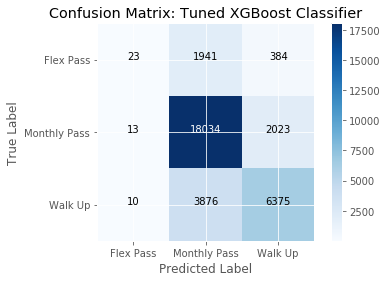

In [220]:
show_cf(y_test, y_pred,class_names=['Flex Pass','Monthly Pass','Walk Up'],model_name='Tuned XGBoost Classifier')

Our Classification Models do quite well. All three score better than 70%!  XGBoost performs the best with overall score of 74% and perhaps most significantly it was able to attribute some predictions to our least common membership type, the  Flex-Pass holders. The underrepresentation of Flex Pass holders in the dataset makes prodiction tricky and there are techniques for resampling to overcome this, they are beyond the scope of this project

### Conclusion

Machine Learning models are valuable tools for analysing the LA-Metro Bike Sharing Network.
<br> We have demonstrated accurate models of the riding patterns of different membership types with a 74% prediction accuracy.
<br>Ride Duration modelling accounts for 30% of variance from the mean, which is not insubstantial, plans to improve are in Future Work

### Future Work


1. Current dataset covers 9 months, updated data lengthening the timescale will allow for year on year factors to be accounted for.
2. Time is binned by hour in this exercise, more detailed usage of time series data may improve accuracy
3. Resampling method such as SMOTE for Classification models to boost accuracy for Flex Pass membership prediction\
4. Extract most influential features from models and explore their influence on ridership 
5. Tune Classification models based on business case for maximising accuracy in relation to a particular Membership Type with the goal of guiding membership in that direction
6. Alternative ride Duration modelling using classifier models on binned Duration intervals
7. Import and cross-reference weather data for more accurate Duration prediction.

## Appendix

Below is an attempt to model ride duration using ride starting features only. Modelling achieved only the modest modest of results.

### Model Building - Regression Model for Duration



Can we predict the duration of a ride based on the starting conditions? 

Only one person can ride a bike at a time but many people can ride a bike over time. Knowing how long your bikes are going to be tied up for is an invaluable piece of information concerning a bike network's functionality and viability and to explore the influences on rider behaviour.

No features are used that could not be determined until the bike is dropped off (e.g. Ending Station ID)

In [144]:
df.columns

Index(['Duration', 'Start Time', 'End Time', 'Starting Station ID',
       'Starting Station Latitude', 'Starting Station Longitude',
       'Ending Station ID', 'Ending Station Latitude',
       'Ending Station Longitude', 'Bike ID', 'Trip Route Category',
       'Passholder Type', 'Start Month', 'Start Day', 'Time Only',
       'Time Only Int', 'Peak'],
      dtype='object')

In [145]:
X=df[['Starting Station ID',
     'Starting Station Latitude',
     'Starting Station Longitude',
#      'Bike ID',
     'Passholder Type',
     'Start Month',
     'Start Day',
     'Time Only Int',
     'Peak']]
y=df['Duration'].clip(upper =30)

data type correction - float to object


In [146]:
X['Starting Station ID']=X['Starting Station ID'].astype('str')
# X['Bike ID']=X['Bike ID'].astype('str')
X.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 130715 entries, 17848847 to 5250466
Data columns (total 8 columns):
Starting Station ID           130715 non-null object
Starting Station Latitude     130715 non-null float64
Starting Station Longitude    130715 non-null float64
Passholder Type               130715 non-null object
Start Month                   130715 non-null object
Start Day                     130715 non-null object
Time Only Int                 130715 non-null int64
Peak                          130715 non-null int64
dtypes: float64(2), int64(2), object(4)
memory usage: 9.0+ MB


C:\Users\kosta\Anaconda3\envs\learn-env\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


Categorical data is one-hot encoded to be useable by the machine learning model

In [147]:
X=pd.get_dummies(X)
X.shape

(130715, 89)

All features are converted to a standard scale to eliminate weighting imparted by differening unit sizes

In [148]:
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()
scaler.fit_transform(X)

C:\Users\kosta\Anaconda3\envs\learn-env\lib\site-packages\sklearn\preprocessing\data.py:625: DataConversionWarning: Data with input dtype uint8, int64, float64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
C:\Users\kosta\Anaconda3\envs\learn-env\lib\site-packages\sklearn\base.py:462: DataConversionWarning: Data with input dtype uint8, int64, float64 were all converted to float64 by StandardScaler.
  return self.fit(X, **fit_params).transform(X)


array([[-0.16140359,  1.10770092,  1.51140003, ..., -0.42611322,
        -0.41136045, -0.41937487],
       [ 0.20523359,  0.32241175,  1.70901426, ..., -0.42611322,
        -0.41136045, -0.41937487],
       [-0.23218297,  1.48400529, -1.25519922, ...,  2.34679412,
        -0.41136045, -0.41937487],
       ...,
       [ 1.42564309,  1.12521764,  0.32571464, ..., -0.42611322,
        -0.41136045, -0.41937487],
       [-1.31457267,  1.53306953, -1.05758499, ..., -0.42611322,
        -0.41136045, -0.41937487],
       [ 0.86104385,  0.18924985,  0.7209431 , ..., -0.42611322,
         2.43095805, -0.41937487]])

Principal Component Analysis is used to reduce dimensionality without losing significant proportions of data

[88.34182611112801, 1.5116577235424173, 0.6081519707127852, 0.5364407736387048, 0.5307630970735079]
99.99999999999996


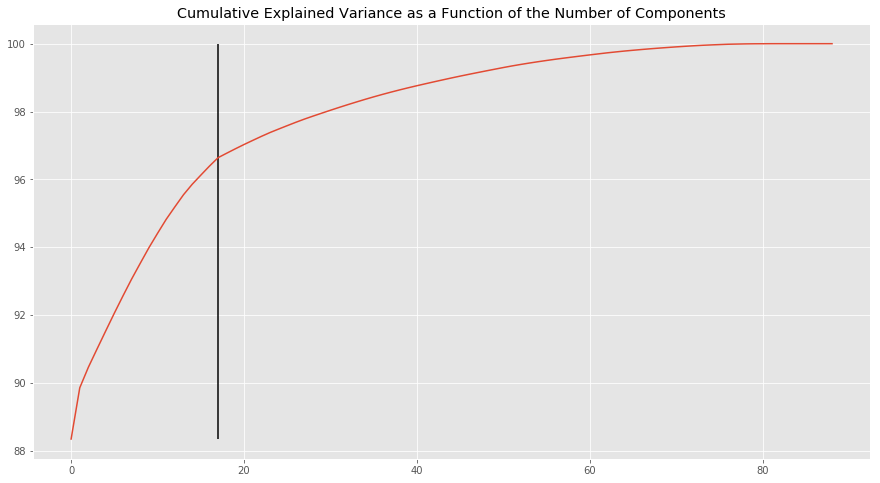

In [149]:
from sklearn.decomposition import PCA
pca=PCA()
pca.fit(X)
tot = sum(pca.explained_variance_)
var_exp = [(i/tot)*100 for i in sorted(pca.explained_variance_, reverse=True)] 
print(var_exp[0:5])
print(sum(var_exp))
cum_var_exp = np.cumsum(var_exp) 
plt.style.use('ggplot')
plt.figure(figsize=(15, 8))
plt.plot(cum_var_exp)
plt.title('Cumulative Explained Variance as a Function of the Number of Components')
plt.vlines(x=17,ymin=var_exp[0],ymax=100)
plt.show()

Using 17 components retains >96% of variance

Data will be reduced using Principal Component Analysis with n_components =17

In [150]:
pca=PCA(n_components=17)
pca.fit(X)

PCA(copy=True, iterated_power='auto', n_components=17, random_state=None,
  svd_solver='auto', tol=0.0, whiten=False)

In [151]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y)

In [152]:
X_train=pca.transform(X_train)
X_test=pca.transform(X_test)

Grid Search for ideal parameters to maximise R-Squared using Decision Tree Regressor

In [153]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import GridSearchCV
param_grid_dtr={'criterion':['mse','friedman_mse',],
               'max_depth': [2,5,10,None],
               'min_samples_split':[2,4,6,10,20],
               'min_samples_leaf':[1,5,10,30,50,70,100]}
grid_dtr=GridSearchCV(estimator=DecisionTreeRegressor(),
                     param_grid=param_grid_dtr, 
                      cv=3,
                     verbose=2,)

In [154]:

grid_dtr.fit(X_train,y_train)

Fitting 3 folds for each of 280 candidates, totalling 840 fits
[CV] criterion=mse, max_depth=2, min_samples_leaf=1, min_samples_split=2 


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


[CV]  criterion=mse, max_depth=2, min_samples_leaf=1, min_samples_split=2, total=   0.3s
[CV] criterion=mse, max_depth=2, min_samples_leaf=1, min_samples_split=2 


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.3s remaining:    0.0s


[CV]  criterion=mse, max_depth=2, min_samples_leaf=1, min_samples_split=2, total=   0.3s
[CV] criterion=mse, max_depth=2, min_samples_leaf=1, min_samples_split=2 
[CV]  criterion=mse, max_depth=2, min_samples_leaf=1, min_samples_split=2, total=   0.4s
[CV] criterion=mse, max_depth=2, min_samples_leaf=1, min_samples_split=4 
[CV]  criterion=mse, max_depth=2, min_samples_leaf=1, min_samples_split=4, total=   0.2s
[CV] criterion=mse, max_depth=2, min_samples_leaf=1, min_samples_split=4 
[CV]  criterion=mse, max_depth=2, min_samples_leaf=1, min_samples_split=4, total=   0.3s
[CV] criterion=mse, max_depth=2, min_samples_leaf=1, min_samples_split=4 
[CV]  criterion=mse, max_depth=2, min_samples_leaf=1, min_samples_split=4, total=   0.3s
[CV] criterion=mse, max_depth=2, min_samples_leaf=1, min_samples_split=6 
[CV]  criterion=mse, max_depth=2, min_samples_leaf=1, min_samples_split=6, total=   0.2s
[CV] criterion=mse, max_depth=2, min_samples_leaf=1, min_samples_split=6 
[CV]  criterion=mse, m

[CV]  criterion=mse, max_depth=2, min_samples_leaf=30, min_samples_split=6, total=   0.4s
[CV] criterion=mse, max_depth=2, min_samples_leaf=30, min_samples_split=6 
[CV]  criterion=mse, max_depth=2, min_samples_leaf=30, min_samples_split=6, total=   0.3s
[CV] criterion=mse, max_depth=2, min_samples_leaf=30, min_samples_split=6 
[CV]  criterion=mse, max_depth=2, min_samples_leaf=30, min_samples_split=6, total=   0.2s
[CV] criterion=mse, max_depth=2, min_samples_leaf=30, min_samples_split=10 
[CV]  criterion=mse, max_depth=2, min_samples_leaf=30, min_samples_split=10, total=   0.2s
[CV] criterion=mse, max_depth=2, min_samples_leaf=30, min_samples_split=10 
[CV]  criterion=mse, max_depth=2, min_samples_leaf=30, min_samples_split=10, total=   0.3s
[CV] criterion=mse, max_depth=2, min_samples_leaf=30, min_samples_split=10 
[CV]  criterion=mse, max_depth=2, min_samples_leaf=30, min_samples_split=10, total=   0.2s
[CV] criterion=mse, max_depth=2, min_samples_leaf=30, min_samples_split=20 
[CV

[CV]  criterion=mse, max_depth=2, min_samples_leaf=100, min_samples_split=10, total=   0.4s
[CV] criterion=mse, max_depth=2, min_samples_leaf=100, min_samples_split=20 
[CV]  criterion=mse, max_depth=2, min_samples_leaf=100, min_samples_split=20, total=   0.4s
[CV] criterion=mse, max_depth=2, min_samples_leaf=100, min_samples_split=20 
[CV]  criterion=mse, max_depth=2, min_samples_leaf=100, min_samples_split=20, total=   0.4s
[CV] criterion=mse, max_depth=2, min_samples_leaf=100, min_samples_split=20 
[CV]  criterion=mse, max_depth=2, min_samples_leaf=100, min_samples_split=20, total=   0.2s
[CV] criterion=mse, max_depth=5, min_samples_leaf=1, min_samples_split=2 
[CV]  criterion=mse, max_depth=5, min_samples_leaf=1, min_samples_split=2, total=   0.9s
[CV] criterion=mse, max_depth=5, min_samples_leaf=1, min_samples_split=2 
[CV]  criterion=mse, max_depth=5, min_samples_leaf=1, min_samples_split=2, total=   1.0s
[CV] criterion=mse, max_depth=5, min_samples_leaf=1, min_samples_split=2 
[

[CV]  criterion=mse, max_depth=5, min_samples_leaf=30, min_samples_split=2, total=   0.8s
[CV] criterion=mse, max_depth=5, min_samples_leaf=30, min_samples_split=2 
[CV]  criterion=mse, max_depth=5, min_samples_leaf=30, min_samples_split=2, total=   0.8s
[CV] criterion=mse, max_depth=5, min_samples_leaf=30, min_samples_split=4 
[CV]  criterion=mse, max_depth=5, min_samples_leaf=30, min_samples_split=4, total=   0.9s
[CV] criterion=mse, max_depth=5, min_samples_leaf=30, min_samples_split=4 
[CV]  criterion=mse, max_depth=5, min_samples_leaf=30, min_samples_split=4, total=   0.9s
[CV] criterion=mse, max_depth=5, min_samples_leaf=30, min_samples_split=4 
[CV]  criterion=mse, max_depth=5, min_samples_leaf=30, min_samples_split=4, total=   0.8s
[CV] criterion=mse, max_depth=5, min_samples_leaf=30, min_samples_split=6 
[CV]  criterion=mse, max_depth=5, min_samples_leaf=30, min_samples_split=6, total=   0.9s
[CV] criterion=mse, max_depth=5, min_samples_leaf=30, min_samples_split=6 
[CV]  crit

[CV]  criterion=mse, max_depth=5, min_samples_leaf=100, min_samples_split=6, total=   0.9s
[CV] criterion=mse, max_depth=5, min_samples_leaf=100, min_samples_split=6 
[CV]  criterion=mse, max_depth=5, min_samples_leaf=100, min_samples_split=6, total=   0.8s
[CV] criterion=mse, max_depth=5, min_samples_leaf=100, min_samples_split=6 
[CV]  criterion=mse, max_depth=5, min_samples_leaf=100, min_samples_split=6, total=   0.8s
[CV] criterion=mse, max_depth=5, min_samples_leaf=100, min_samples_split=10 
[CV]  criterion=mse, max_depth=5, min_samples_leaf=100, min_samples_split=10, total=   0.9s
[CV] criterion=mse, max_depth=5, min_samples_leaf=100, min_samples_split=10 
[CV]  criterion=mse, max_depth=5, min_samples_leaf=100, min_samples_split=10, total=   1.0s
[CV] criterion=mse, max_depth=5, min_samples_leaf=100, min_samples_split=10 
[CV]  criterion=mse, max_depth=5, min_samples_leaf=100, min_samples_split=10, total=   0.5s
[CV] criterion=mse, max_depth=5, min_samples_leaf=100, min_samples_s

[CV]  criterion=mse, max_depth=10, min_samples_leaf=10, min_samples_split=10, total=   0.7s
[CV] criterion=mse, max_depth=10, min_samples_leaf=10, min_samples_split=20 
[CV]  criterion=mse, max_depth=10, min_samples_leaf=10, min_samples_split=20, total=   0.7s
[CV] criterion=mse, max_depth=10, min_samples_leaf=10, min_samples_split=20 
[CV]  criterion=mse, max_depth=10, min_samples_leaf=10, min_samples_split=20, total=   0.7s
[CV] criterion=mse, max_depth=10, min_samples_leaf=10, min_samples_split=20 
[CV]  criterion=mse, max_depth=10, min_samples_leaf=10, min_samples_split=20, total=   0.7s
[CV] criterion=mse, max_depth=10, min_samples_leaf=30, min_samples_split=2 
[CV]  criterion=mse, max_depth=10, min_samples_leaf=30, min_samples_split=2, total=   0.7s
[CV] criterion=mse, max_depth=10, min_samples_leaf=30, min_samples_split=2 
[CV]  criterion=mse, max_depth=10, min_samples_leaf=30, min_samples_split=2, total=   0.7s
[CV] criterion=mse, max_depth=10, min_samples_leaf=30, min_samples_

[CV]  criterion=mse, max_depth=10, min_samples_leaf=100, min_samples_split=2, total=   0.7s
[CV] criterion=mse, max_depth=10, min_samples_leaf=100, min_samples_split=2 
[CV]  criterion=mse, max_depth=10, min_samples_leaf=100, min_samples_split=2, total=   0.6s
[CV] criterion=mse, max_depth=10, min_samples_leaf=100, min_samples_split=2 
[CV]  criterion=mse, max_depth=10, min_samples_leaf=100, min_samples_split=2, total=   0.6s
[CV] criterion=mse, max_depth=10, min_samples_leaf=100, min_samples_split=4 
[CV]  criterion=mse, max_depth=10, min_samples_leaf=100, min_samples_split=4, total=   0.6s
[CV] criterion=mse, max_depth=10, min_samples_leaf=100, min_samples_split=4 
[CV]  criterion=mse, max_depth=10, min_samples_leaf=100, min_samples_split=4, total=   0.6s
[CV] criterion=mse, max_depth=10, min_samples_leaf=100, min_samples_split=4 
[CV]  criterion=mse, max_depth=10, min_samples_leaf=100, min_samples_split=4, total=   0.7s
[CV] criterion=mse, max_depth=10, min_samples_leaf=100, min_sam

[CV]  criterion=mse, max_depth=None, min_samples_leaf=10, min_samples_split=4, total=   1.3s
[CV] criterion=mse, max_depth=None, min_samples_leaf=10, min_samples_split=4 
[CV]  criterion=mse, max_depth=None, min_samples_leaf=10, min_samples_split=4, total=   1.3s
[CV] criterion=mse, max_depth=None, min_samples_leaf=10, min_samples_split=6 
[CV]  criterion=mse, max_depth=None, min_samples_leaf=10, min_samples_split=6, total=   1.3s
[CV] criterion=mse, max_depth=None, min_samples_leaf=10, min_samples_split=6 
[CV]  criterion=mse, max_depth=None, min_samples_leaf=10, min_samples_split=6, total=   1.3s
[CV] criterion=mse, max_depth=None, min_samples_leaf=10, min_samples_split=6 
[CV]  criterion=mse, max_depth=None, min_samples_leaf=10, min_samples_split=6, total=   1.3s
[CV] criterion=mse, max_depth=None, min_samples_leaf=10, min_samples_split=10 
[CV]  criterion=mse, max_depth=None, min_samples_leaf=10, min_samples_split=10, total=   1.3s
[CV] criterion=mse, max_depth=None, min_samples_le

[CV]  criterion=mse, max_depth=None, min_samples_leaf=70, min_samples_split=6, total=   0.9s
[CV] criterion=mse, max_depth=None, min_samples_leaf=70, min_samples_split=6 
[CV]  criterion=mse, max_depth=None, min_samples_leaf=70, min_samples_split=6, total=   0.9s
[CV] criterion=mse, max_depth=None, min_samples_leaf=70, min_samples_split=10 
[CV]  criterion=mse, max_depth=None, min_samples_leaf=70, min_samples_split=10, total=   0.9s
[CV] criterion=mse, max_depth=None, min_samples_leaf=70, min_samples_split=10 
[CV]  criterion=mse, max_depth=None, min_samples_leaf=70, min_samples_split=10, total=   0.9s
[CV] criterion=mse, max_depth=None, min_samples_leaf=70, min_samples_split=10 
[CV]  criterion=mse, max_depth=None, min_samples_leaf=70, min_samples_split=10, total=   0.9s
[CV] criterion=mse, max_depth=None, min_samples_leaf=70, min_samples_split=20 
[CV]  criterion=mse, max_depth=None, min_samples_leaf=70, min_samples_split=20, total=   0.9s
[CV] criterion=mse, max_depth=None, min_samp

[CV]  criterion=friedman_mse, max_depth=2, min_samples_leaf=5, min_samples_split=10, total=   0.1s
[CV] criterion=friedman_mse, max_depth=2, min_samples_leaf=5, min_samples_split=10 
[CV]  criterion=friedman_mse, max_depth=2, min_samples_leaf=5, min_samples_split=10, total=   0.1s
[CV] criterion=friedman_mse, max_depth=2, min_samples_leaf=5, min_samples_split=10 
[CV]  criterion=friedman_mse, max_depth=2, min_samples_leaf=5, min_samples_split=10, total=   0.1s
[CV] criterion=friedman_mse, max_depth=2, min_samples_leaf=5, min_samples_split=20 
[CV]  criterion=friedman_mse, max_depth=2, min_samples_leaf=5, min_samples_split=20, total=   0.1s
[CV] criterion=friedman_mse, max_depth=2, min_samples_leaf=5, min_samples_split=20 
[CV]  criterion=friedman_mse, max_depth=2, min_samples_leaf=5, min_samples_split=20, total=   0.1s
[CV] criterion=friedman_mse, max_depth=2, min_samples_leaf=5, min_samples_split=20 
[CV]  criterion=friedman_mse, max_depth=2, min_samples_leaf=5, min_samples_split=20, 

[CV]  criterion=friedman_mse, max_depth=2, min_samples_leaf=50, min_samples_split=10, total=   0.1s
[CV] criterion=friedman_mse, max_depth=2, min_samples_leaf=50, min_samples_split=10 
[CV]  criterion=friedman_mse, max_depth=2, min_samples_leaf=50, min_samples_split=10, total=   0.1s
[CV] criterion=friedman_mse, max_depth=2, min_samples_leaf=50, min_samples_split=10 
[CV]  criterion=friedman_mse, max_depth=2, min_samples_leaf=50, min_samples_split=10, total=   0.1s
[CV] criterion=friedman_mse, max_depth=2, min_samples_leaf=50, min_samples_split=20 
[CV]  criterion=friedman_mse, max_depth=2, min_samples_leaf=50, min_samples_split=20, total=   0.1s
[CV] criterion=friedman_mse, max_depth=2, min_samples_leaf=50, min_samples_split=20 
[CV]  criterion=friedman_mse, max_depth=2, min_samples_leaf=50, min_samples_split=20, total=   0.1s
[CV] criterion=friedman_mse, max_depth=2, min_samples_leaf=50, min_samples_split=20 
[CV]  criterion=friedman_mse, max_depth=2, min_samples_leaf=50, min_samples

[CV]  criterion=friedman_mse, max_depth=5, min_samples_leaf=1, min_samples_split=10, total=   0.3s
[CV] criterion=friedman_mse, max_depth=5, min_samples_leaf=1, min_samples_split=10 
[CV]  criterion=friedman_mse, max_depth=5, min_samples_leaf=1, min_samples_split=10, total=   0.4s
[CV] criterion=friedman_mse, max_depth=5, min_samples_leaf=1, min_samples_split=10 
[CV]  criterion=friedman_mse, max_depth=5, min_samples_leaf=1, min_samples_split=10, total=   0.3s
[CV] criterion=friedman_mse, max_depth=5, min_samples_leaf=1, min_samples_split=20 
[CV]  criterion=friedman_mse, max_depth=5, min_samples_leaf=1, min_samples_split=20, total=   0.4s
[CV] criterion=friedman_mse, max_depth=5, min_samples_leaf=1, min_samples_split=20 
[CV]  criterion=friedman_mse, max_depth=5, min_samples_leaf=1, min_samples_split=20, total=   0.3s
[CV] criterion=friedman_mse, max_depth=5, min_samples_leaf=1, min_samples_split=20 
[CV]  criterion=friedman_mse, max_depth=5, min_samples_leaf=1, min_samples_split=20, 

[CV]  criterion=friedman_mse, max_depth=5, min_samples_leaf=30, min_samples_split=10, total=   0.3s
[CV] criterion=friedman_mse, max_depth=5, min_samples_leaf=30, min_samples_split=10 
[CV]  criterion=friedman_mse, max_depth=5, min_samples_leaf=30, min_samples_split=10, total=   0.4s
[CV] criterion=friedman_mse, max_depth=5, min_samples_leaf=30, min_samples_split=10 
[CV]  criterion=friedman_mse, max_depth=5, min_samples_leaf=30, min_samples_split=10, total=   0.3s
[CV] criterion=friedman_mse, max_depth=5, min_samples_leaf=30, min_samples_split=20 
[CV]  criterion=friedman_mse, max_depth=5, min_samples_leaf=30, min_samples_split=20, total=   0.3s
[CV] criterion=friedman_mse, max_depth=5, min_samples_leaf=30, min_samples_split=20 
[CV]  criterion=friedman_mse, max_depth=5, min_samples_leaf=30, min_samples_split=20, total=   0.3s
[CV] criterion=friedman_mse, max_depth=5, min_samples_leaf=30, min_samples_split=20 
[CV]  criterion=friedman_mse, max_depth=5, min_samples_leaf=30, min_samples

[CV]  criterion=friedman_mse, max_depth=5, min_samples_leaf=100, min_samples_split=10, total=   0.4s
[CV] criterion=friedman_mse, max_depth=5, min_samples_leaf=100, min_samples_split=10 
[CV]  criterion=friedman_mse, max_depth=5, min_samples_leaf=100, min_samples_split=10, total=   0.3s
[CV] criterion=friedman_mse, max_depth=5, min_samples_leaf=100, min_samples_split=10 
[CV]  criterion=friedman_mse, max_depth=5, min_samples_leaf=100, min_samples_split=10, total=   0.4s
[CV] criterion=friedman_mse, max_depth=5, min_samples_leaf=100, min_samples_split=20 
[CV]  criterion=friedman_mse, max_depth=5, min_samples_leaf=100, min_samples_split=20, total=   0.3s
[CV] criterion=friedman_mse, max_depth=5, min_samples_leaf=100, min_samples_split=20 
[CV]  criterion=friedman_mse, max_depth=5, min_samples_leaf=100, min_samples_split=20, total=   0.3s
[CV] criterion=friedman_mse, max_depth=5, min_samples_leaf=100, min_samples_split=20 
[CV]  criterion=friedman_mse, max_depth=5, min_samples_leaf=100, 

[CV]  criterion=friedman_mse, max_depth=10, min_samples_leaf=10, min_samples_split=10, total=   0.7s
[CV] criterion=friedman_mse, max_depth=10, min_samples_leaf=10, min_samples_split=10 
[CV]  criterion=friedman_mse, max_depth=10, min_samples_leaf=10, min_samples_split=10, total=   0.7s
[CV] criterion=friedman_mse, max_depth=10, min_samples_leaf=10, min_samples_split=10 
[CV]  criterion=friedman_mse, max_depth=10, min_samples_leaf=10, min_samples_split=10, total=   0.7s
[CV] criterion=friedman_mse, max_depth=10, min_samples_leaf=10, min_samples_split=20 
[CV]  criterion=friedman_mse, max_depth=10, min_samples_leaf=10, min_samples_split=20, total=   0.7s
[CV] criterion=friedman_mse, max_depth=10, min_samples_leaf=10, min_samples_split=20 
[CV]  criterion=friedman_mse, max_depth=10, min_samples_leaf=10, min_samples_split=20, total=   0.7s
[CV] criterion=friedman_mse, max_depth=10, min_samples_leaf=10, min_samples_split=20 
[CV]  criterion=friedman_mse, max_depth=10, min_samples_leaf=10, 

[CV]  criterion=friedman_mse, max_depth=10, min_samples_leaf=70, min_samples_split=10, total=   0.7s
[CV] criterion=friedman_mse, max_depth=10, min_samples_leaf=70, min_samples_split=10 
[CV]  criterion=friedman_mse, max_depth=10, min_samples_leaf=70, min_samples_split=10, total=   0.7s
[CV] criterion=friedman_mse, max_depth=10, min_samples_leaf=70, min_samples_split=10 
[CV]  criterion=friedman_mse, max_depth=10, min_samples_leaf=70, min_samples_split=10, total=   0.7s
[CV] criterion=friedman_mse, max_depth=10, min_samples_leaf=70, min_samples_split=20 
[CV]  criterion=friedman_mse, max_depth=10, min_samples_leaf=70, min_samples_split=20, total=   0.7s
[CV] criterion=friedman_mse, max_depth=10, min_samples_leaf=70, min_samples_split=20 
[CV]  criterion=friedman_mse, max_depth=10, min_samples_leaf=70, min_samples_split=20, total=   0.7s
[CV] criterion=friedman_mse, max_depth=10, min_samples_leaf=70, min_samples_split=20 
[CV]  criterion=friedman_mse, max_depth=10, min_samples_leaf=70, 

[CV]  criterion=friedman_mse, max_depth=None, min_samples_leaf=5, min_samples_split=6, total=   1.4s
[CV] criterion=friedman_mse, max_depth=None, min_samples_leaf=5, min_samples_split=10 
[CV]  criterion=friedman_mse, max_depth=None, min_samples_leaf=5, min_samples_split=10, total=   1.4s
[CV] criterion=friedman_mse, max_depth=None, min_samples_leaf=5, min_samples_split=10 
[CV]  criterion=friedman_mse, max_depth=None, min_samples_leaf=5, min_samples_split=10, total=   1.4s
[CV] criterion=friedman_mse, max_depth=None, min_samples_leaf=5, min_samples_split=10 
[CV]  criterion=friedman_mse, max_depth=None, min_samples_leaf=5, min_samples_split=10, total=   1.4s
[CV] criterion=friedman_mse, max_depth=None, min_samples_leaf=5, min_samples_split=20 
[CV]  criterion=friedman_mse, max_depth=None, min_samples_leaf=5, min_samples_split=20, total=   1.4s
[CV] criterion=friedman_mse, max_depth=None, min_samples_leaf=5, min_samples_split=20 
[CV]  criterion=friedman_mse, max_depth=None, min_sample

[CV]  criterion=friedman_mse, max_depth=None, min_samples_leaf=50, min_samples_split=6, total=   1.0s
[CV] criterion=friedman_mse, max_depth=None, min_samples_leaf=50, min_samples_split=6 
[CV]  criterion=friedman_mse, max_depth=None, min_samples_leaf=50, min_samples_split=6, total=   1.0s
[CV] criterion=friedman_mse, max_depth=None, min_samples_leaf=50, min_samples_split=10 
[CV]  criterion=friedman_mse, max_depth=None, min_samples_leaf=50, min_samples_split=10, total=   1.0s
[CV] criterion=friedman_mse, max_depth=None, min_samples_leaf=50, min_samples_split=10 
[CV]  criterion=friedman_mse, max_depth=None, min_samples_leaf=50, min_samples_split=10, total=   1.0s
[CV] criterion=friedman_mse, max_depth=None, min_samples_leaf=50, min_samples_split=10 
[CV]  criterion=friedman_mse, max_depth=None, min_samples_leaf=50, min_samples_split=10, total=   1.0s
[CV] criterion=friedman_mse, max_depth=None, min_samples_leaf=50, min_samples_split=20 
[CV]  criterion=friedman_mse, max_depth=None, mi

[Parallel(n_jobs=1)]: Done 840 out of 840 | elapsed: 10.8min finished


GridSearchCV(cv=3, error_score='raise-deprecating',
       estimator=DecisionTreeRegressor(criterion='mse', max_depth=None, max_features=None,
           max_leaf_nodes=None, min_impurity_decrease=0.0,
           min_impurity_split=None, min_samples_leaf=1,
           min_samples_split=2, min_weight_fraction_leaf=0.0,
           presort=False, random_state=None, splitter='best'),
       fit_params=None, iid='warn', n_jobs=None,
       param_grid={'criterion': ['mse', 'friedman_mse'], 'max_depth': [2, 5, 10, None], 'min_samples_split': [2, 4, 6, 10, 20], 'min_samples_leaf': [1, 5, 10, 30, 50, 70, 100]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring=None, verbose=2)

In [155]:
grid_dtr.best_params_

{'criterion': 'mse',
 'max_depth': 5,
 'min_samples_leaf': 100,
 'min_samples_split': 2}

In [156]:
grid_dtr.best_score_

0.26617069352553746

26.6% of Variance explained by Decision Tree Regression Model with split criterion of Mean Squared Error, Maximum Depth of 5, Minimum Samples per Leaf of 100 and Minimum Samples per Split of 2

Grid Search for ideal parameters to maximise R-Squared using Random Forest Regressor

In [157]:
from sklearn.ensemble import RandomForestRegressor
param_grid_rfr={'n_estimators':[10,100],
                'max_depth': [2, 5, 10, None],  
                'min_samples_split':[2,4,6,10],
               'min_samples_leaf':[1,5,10]}

grid_rfr=GridSearchCV(estimator=RandomForestRegressor(),
                     param_grid=param_grid_rfr,
                     cv=3,
                     verbose=2)
grid_rfr.fit(X_train,y_train)

Fitting 3 folds for each of 96 candidates, totalling 288 fits
[CV] criterion=mse, max_depth=2, min_samples_leaf=1, min_samples_split=2, n_estimators=10 


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


[CV]  criterion=mse, max_depth=2, min_samples_leaf=1, min_samples_split=2, n_estimators=10, total=   1.2s
[CV] criterion=mse, max_depth=2, min_samples_leaf=1, min_samples_split=2, n_estimators=10 


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    1.2s remaining:    0.0s


[CV]  criterion=mse, max_depth=2, min_samples_leaf=1, min_samples_split=2, n_estimators=10, total=   1.2s
[CV] criterion=mse, max_depth=2, min_samples_leaf=1, min_samples_split=2, n_estimators=10 
[CV]  criterion=mse, max_depth=2, min_samples_leaf=1, min_samples_split=2, n_estimators=10, total=   1.2s
[CV] criterion=mse, max_depth=2, min_samples_leaf=1, min_samples_split=2, n_estimators=100 
[CV]  criterion=mse, max_depth=2, min_samples_leaf=1, min_samples_split=2, n_estimators=100, total=  12.5s
[CV] criterion=mse, max_depth=2, min_samples_leaf=1, min_samples_split=2, n_estimators=100 
[CV]  criterion=mse, max_depth=2, min_samples_leaf=1, min_samples_split=2, n_estimators=100, total=  12.6s
[CV] criterion=mse, max_depth=2, min_samples_leaf=1, min_samples_split=2, n_estimators=100 
[CV]  criterion=mse, max_depth=2, min_samples_leaf=1, min_samples_split=2, n_estimators=100, total=  12.2s
[CV] criterion=mse, max_depth=2, min_samples_leaf=1, min_samples_split=4, n_estimators=10 
[CV]  cri

[CV]  criterion=mse, max_depth=2, min_samples_leaf=5, min_samples_split=10, n_estimators=10, total=   1.2s
[CV] criterion=mse, max_depth=2, min_samples_leaf=5, min_samples_split=10, n_estimators=10 
[CV]  criterion=mse, max_depth=2, min_samples_leaf=5, min_samples_split=10, n_estimators=10, total=   1.1s
[CV] criterion=mse, max_depth=2, min_samples_leaf=5, min_samples_split=10, n_estimators=100 
[CV]  criterion=mse, max_depth=2, min_samples_leaf=5, min_samples_split=10, n_estimators=100, total=  12.5s
[CV] criterion=mse, max_depth=2, min_samples_leaf=5, min_samples_split=10, n_estimators=100 
[CV]  criterion=mse, max_depth=2, min_samples_leaf=5, min_samples_split=10, n_estimators=100, total=  12.4s
[CV] criterion=mse, max_depth=2, min_samples_leaf=5, min_samples_split=10, n_estimators=100 
[CV]  criterion=mse, max_depth=2, min_samples_leaf=5, min_samples_split=10, n_estimators=100, total=  12.3s
[CV] criterion=mse, max_depth=2, min_samples_leaf=10, min_samples_split=2, n_estimators=10 

[CV]  criterion=mse, max_depth=5, min_samples_leaf=1, min_samples_split=6, n_estimators=10, total=   3.0s
[CV] criterion=mse, max_depth=5, min_samples_leaf=1, min_samples_split=6, n_estimators=10 
[CV]  criterion=mse, max_depth=5, min_samples_leaf=1, min_samples_split=6, n_estimators=10, total=   2.7s
[CV] criterion=mse, max_depth=5, min_samples_leaf=1, min_samples_split=6, n_estimators=100 
[CV]  criterion=mse, max_depth=5, min_samples_leaf=1, min_samples_split=6, n_estimators=100, total=  28.2s
[CV] criterion=mse, max_depth=5, min_samples_leaf=1, min_samples_split=6, n_estimators=100 
[CV]  criterion=mse, max_depth=5, min_samples_leaf=1, min_samples_split=6, n_estimators=100, total=  28.1s
[CV] criterion=mse, max_depth=5, min_samples_leaf=1, min_samples_split=6, n_estimators=100 
[CV]  criterion=mse, max_depth=5, min_samples_leaf=1, min_samples_split=6, n_estimators=100, total=  28.0s
[CV] criterion=mse, max_depth=5, min_samples_leaf=1, min_samples_split=10, n_estimators=10 
[CV]  cr

[CV]  criterion=mse, max_depth=5, min_samples_leaf=10, min_samples_split=4, n_estimators=10, total=   2.8s
[CV] criterion=mse, max_depth=5, min_samples_leaf=10, min_samples_split=4, n_estimators=10 
[CV]  criterion=mse, max_depth=5, min_samples_leaf=10, min_samples_split=4, n_estimators=10, total=   2.7s
[CV] criterion=mse, max_depth=5, min_samples_leaf=10, min_samples_split=4, n_estimators=100 
[CV]  criterion=mse, max_depth=5, min_samples_leaf=10, min_samples_split=4, n_estimators=100, total=  28.0s
[CV] criterion=mse, max_depth=5, min_samples_leaf=10, min_samples_split=4, n_estimators=100 
[CV]  criterion=mse, max_depth=5, min_samples_leaf=10, min_samples_split=4, n_estimators=100, total=  28.1s
[CV] criterion=mse, max_depth=5, min_samples_leaf=10, min_samples_split=4, n_estimators=100 
[CV]  criterion=mse, max_depth=5, min_samples_leaf=10, min_samples_split=4, n_estimators=100, total=  28.0s
[CV] criterion=mse, max_depth=5, min_samples_leaf=10, min_samples_split=6, n_estimators=10 

[CV]  criterion=mse, max_depth=10, min_samples_leaf=5, min_samples_split=2, n_estimators=10, total=   5.0s
[CV] criterion=mse, max_depth=10, min_samples_leaf=5, min_samples_split=2, n_estimators=10 
[CV]  criterion=mse, max_depth=10, min_samples_leaf=5, min_samples_split=2, n_estimators=10, total=   4.9s
[CV] criterion=mse, max_depth=10, min_samples_leaf=5, min_samples_split=2, n_estimators=10 
[CV]  criterion=mse, max_depth=10, min_samples_leaf=5, min_samples_split=2, n_estimators=10, total=   5.0s
[CV] criterion=mse, max_depth=10, min_samples_leaf=5, min_samples_split=2, n_estimators=100 
[CV]  criterion=mse, max_depth=10, min_samples_leaf=5, min_samples_split=2, n_estimators=100, total=  50.6s
[CV] criterion=mse, max_depth=10, min_samples_leaf=5, min_samples_split=2, n_estimators=100 
[CV]  criterion=mse, max_depth=10, min_samples_leaf=5, min_samples_split=2, n_estimators=100, total=  50.4s
[CV] criterion=mse, max_depth=10, min_samples_leaf=5, min_samples_split=2, n_estimators=100 


[CV]  criterion=mse, max_depth=10, min_samples_leaf=10, min_samples_split=6, n_estimators=100, total=  50.3s
[CV] criterion=mse, max_depth=10, min_samples_leaf=10, min_samples_split=10, n_estimators=10 
[CV]  criterion=mse, max_depth=10, min_samples_leaf=10, min_samples_split=10, n_estimators=10, total=   4.9s
[CV] criterion=mse, max_depth=10, min_samples_leaf=10, min_samples_split=10, n_estimators=10 
[CV]  criterion=mse, max_depth=10, min_samples_leaf=10, min_samples_split=10, n_estimators=10, total=   4.9s
[CV] criterion=mse, max_depth=10, min_samples_leaf=10, min_samples_split=10, n_estimators=10 
[CV]  criterion=mse, max_depth=10, min_samples_leaf=10, min_samples_split=10, n_estimators=10, total=   5.0s
[CV] criterion=mse, max_depth=10, min_samples_leaf=10, min_samples_split=10, n_estimators=100 
[CV]  criterion=mse, max_depth=10, min_samples_leaf=10, min_samples_split=10, n_estimators=100, total=  50.3s
[CV] criterion=mse, max_depth=10, min_samples_leaf=10, min_samples_split=10, 

[CV]  criterion=mse, max_depth=None, min_samples_leaf=5, min_samples_split=4, n_estimators=100, total= 1.6min
[CV] criterion=mse, max_depth=None, min_samples_leaf=5, min_samples_split=4, n_estimators=100 
[CV]  criterion=mse, max_depth=None, min_samples_leaf=5, min_samples_split=4, n_estimators=100, total= 1.6min
[CV] criterion=mse, max_depth=None, min_samples_leaf=5, min_samples_split=6, n_estimators=10 
[CV]  criterion=mse, max_depth=None, min_samples_leaf=5, min_samples_split=6, n_estimators=10, total=   9.6s
[CV] criterion=mse, max_depth=None, min_samples_leaf=5, min_samples_split=6, n_estimators=10 
[CV]  criterion=mse, max_depth=None, min_samples_leaf=5, min_samples_split=6, n_estimators=10, total=   9.6s
[CV] criterion=mse, max_depth=None, min_samples_leaf=5, min_samples_split=6, n_estimators=10 
[CV]  criterion=mse, max_depth=None, min_samples_leaf=5, min_samples_split=6, n_estimators=10, total=   9.8s
[CV] criterion=mse, max_depth=None, min_samples_leaf=5, min_samples_split=6,

[Parallel(n_jobs=1)]: Done 288 out of 288 | elapsed: 127.1min finished


GridSearchCV(cv=3, error_score='raise-deprecating',
       estimator=RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
           max_features='auto', max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=1, min_samples_split=2,
           min_weight_fraction_leaf=0.0, n_estimators='warn', n_jobs=None,
           oob_score=False, random_state=None, verbose=0, warm_start=False),
       fit_params=None, iid='warn', n_jobs=None,
       param_grid={'n_estimators': [10, 100], 'criterion': ['mse'], 'max_depth': [2, 5, 10, None], 'min_samples_split': [2, 4, 6, 10], 'min_samples_leaf': [1, 5, 10]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring=None, verbose=2)

In [158]:
grid_rfr.best_params_

{'criterion': 'mse',
 'max_depth': None,
 'min_samples_leaf': 10,
 'min_samples_split': 10,
 'n_estimators': 100}

In [159]:
grid_rfr.best_score_

0.30145381427937207

30% of Variance explained by Random Forest Regression Model with split criterion of Mean Squared Error, No Maximum Depth, Minimum Samples per Leaf of 10, Minimum Samples per Split of 10 and 100 estimator (trees)

Predicting the duration of a rider's trip is a difficult task, our models are only succesful in explaining a fraction of the variance in the ride Duration. However, this is a good starting point! We have a demonstrated a partial understanding of rider behaviour based solely on the factors provided. Combining this data with other sources such as weather patterns and rider demographics we can potentially go much further toward a robust predictive model of ride Duration.